# Options

This notebook is a re-implementation and extension of the [Scanpy scRNA-seq tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

To get the data:

```
cd examples
wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
```

In [1]:
%load_ext autoreload
%autoreload 2

import scanpy as sc
import matplotlib.pyplot as plt
from crispr.class_sc import Omics

sc.settings.set_figure_params(dpi=120, frameon=False)

file = "data/filtered_gene_bc_matrices/hg19/"
method_cluster = "leiden"
kws_init = {"assay": None, "assay_protein": None, 
            "col_gene_symbols": "gene_symbols", 
            "col_cell_type": method_cluster, 
            "col_sample_id": None}
kws_pp = {"kws_hvg": {"flavor": "cell_ranger",  "min_mean": 0.0125, 
                      "max_mean": 3, "min_disp": 0.5, "filter": True}, 
          "target_sum": 10000.0, 
          "cell_filter_pmt": [0, 5], 
          "cell_filter_ngene": [200, 2500], 
          "gene_filter_ncell": [3, None], 
          "regress_out": ["total_counts", "pct_counts_mt"], 
          "kws_scale": {"max_value": 10}}
kws_cluster = {"method_cluster": method_cluster, 
               "kws_umap": {},
               "kws_neighbors": {"n_neighbors": 10, "n_pcs": 40},
               "kws_pca": {"svd_solver": "arpack"}, 
               "kws_cluster": {}, 
               "paga": False}
model_celltypist = "Immune_All_High.pkl"
genes = ["CST3", "NKG7", "PPBP"]
kws_plots = dict(vcenter=0, cmap="coolwarm")

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

# Workflow



<<< INITIALIZING OMICS CLASS OBJECT >>>

col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id=None
col_batch=None
col_subject=None
col_condition=None
col_num_umis=None
key_control=None
key_treatment=None


<<< LOADING 10X FILE data/filtered_gene_bc_matrices/hg19/ >>>


Cell Counts: Initial

2700


Gene Counts: Initial



 AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    layers: 'counts'


 AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'
    layers: 'counts'
                     gene_ids
gene_symbols                 
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1]

Un-Used Keyword Arguments: {'assay_protein': None, 'col_sample_id': None, 'col_batch': None, 'col_subject': None, 'col_condition': None,

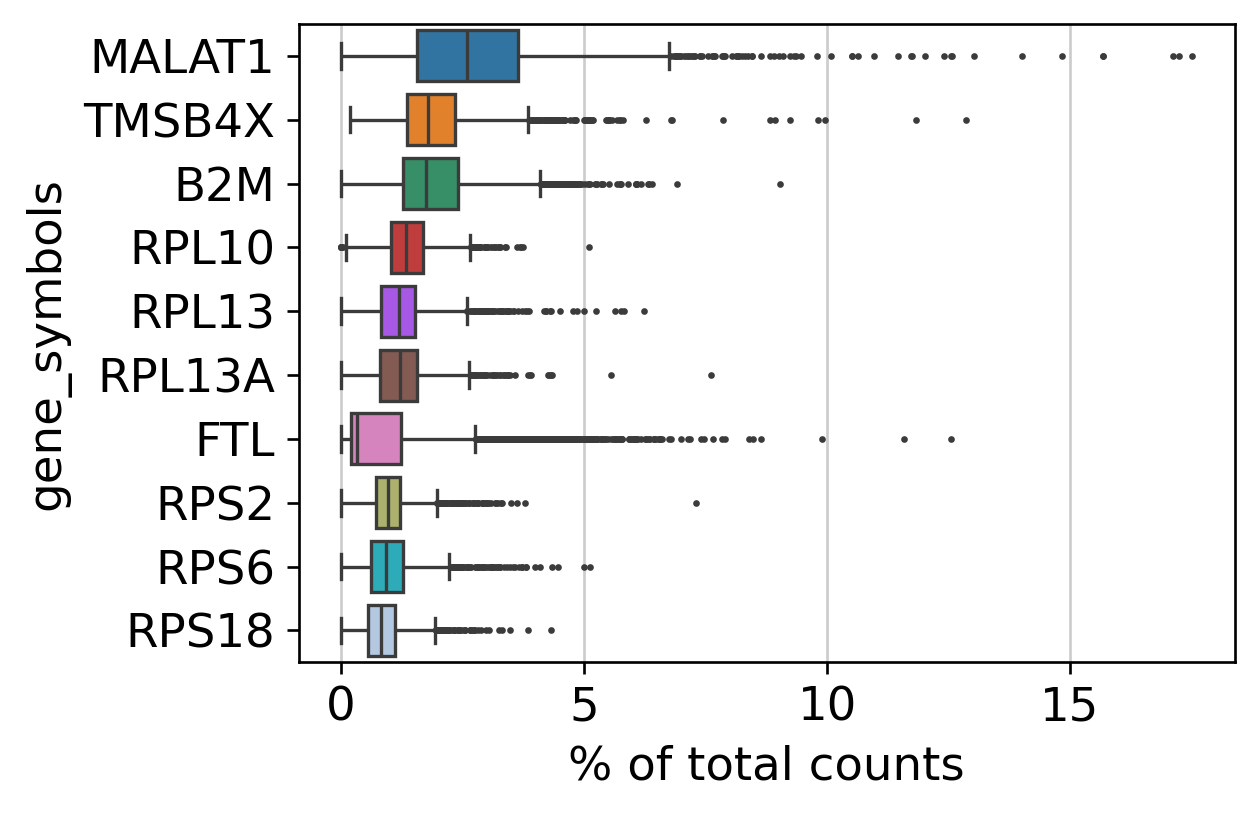



Cell Counts: Initial

2700


Gene Counts: Initial

None 

 10 

        gene_symbols         gene_ids
count         32738            32738
unique        32738            32738
top      MIR1302-10  ENSG00000243485
freq              1                1 



<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


Traceback (most recent call last):
  File "/home/elizabeth/elizabeth/crispr/crispr/processing/preprocessing.py", line 538, in perform_qc
    figs["metrics_violin"] = sc.pl.violin(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/scanpy/plotting/_anndata.py", line 795, in violin
    g = sns.catplot(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/categorical.py", line 2932, in catplot
    p.plot_violins(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/categorica

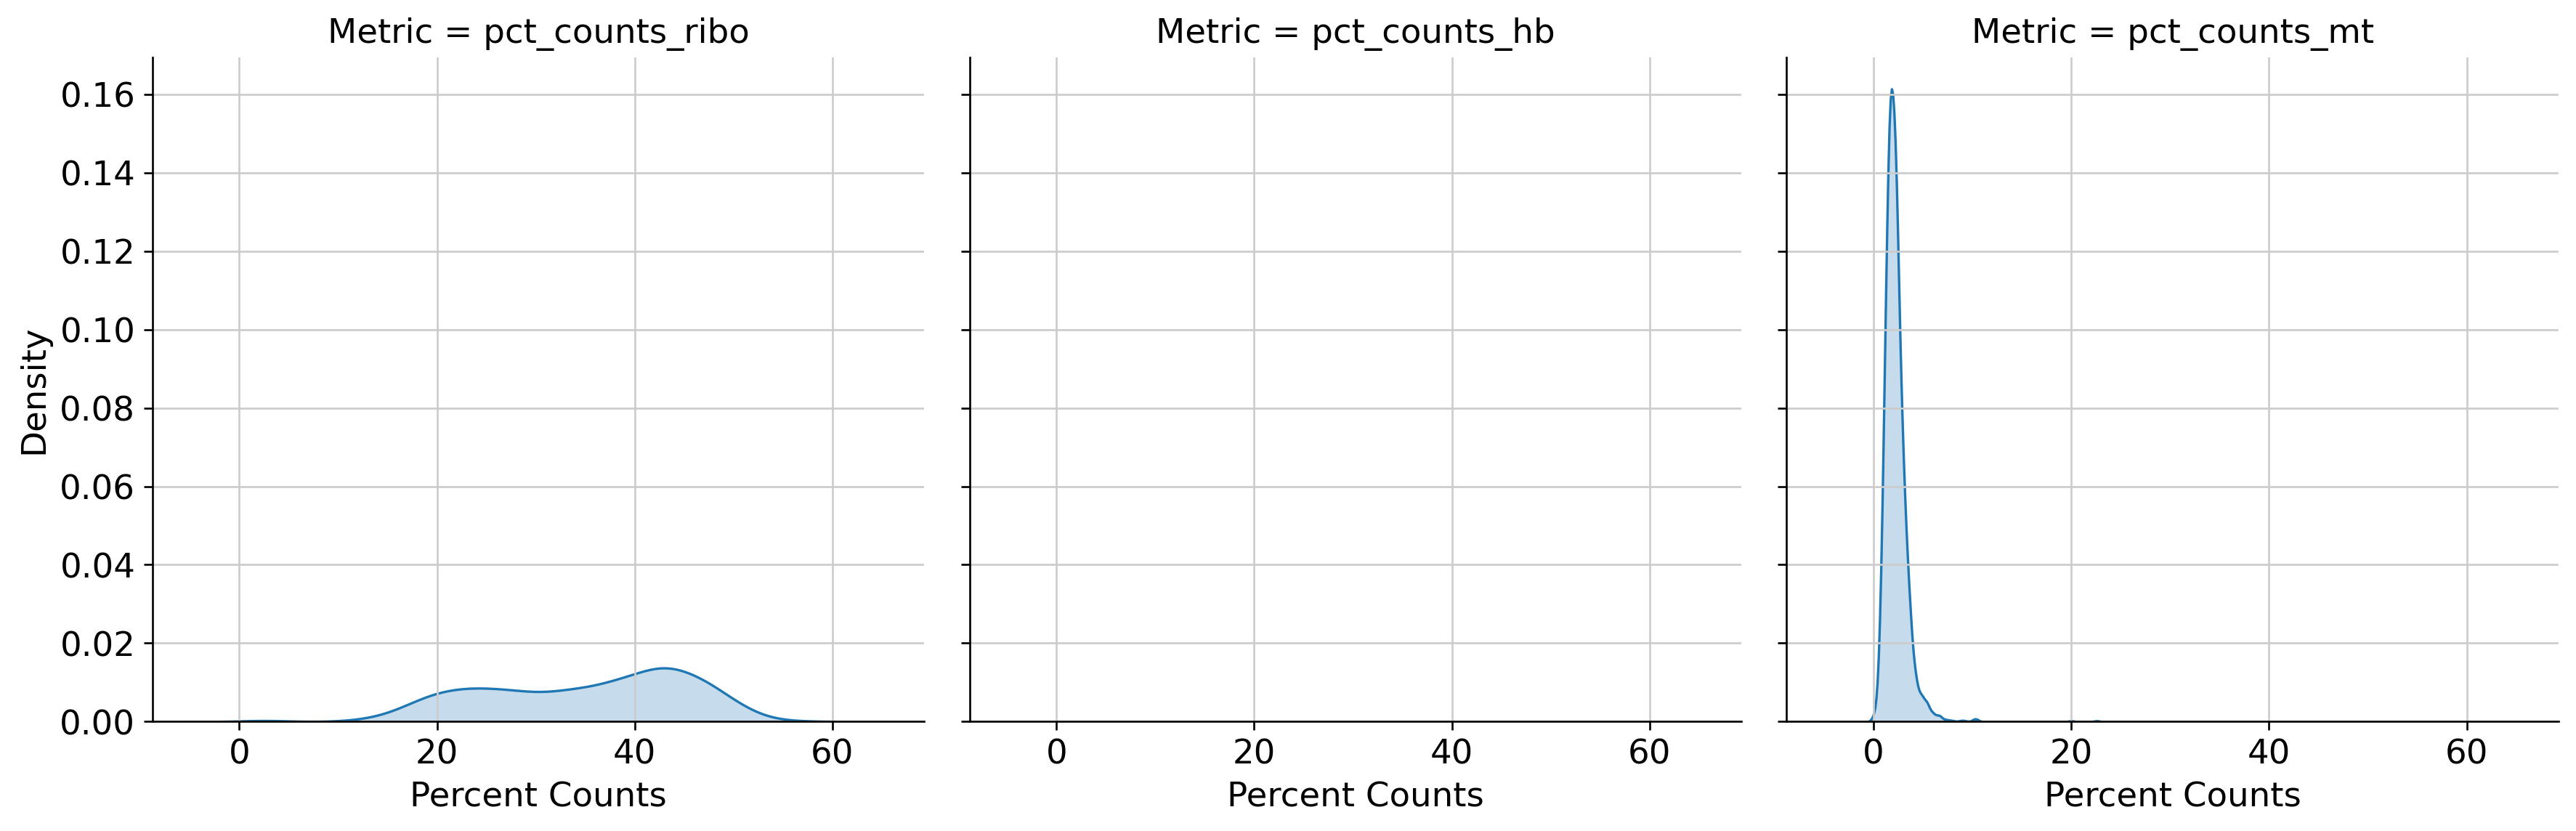

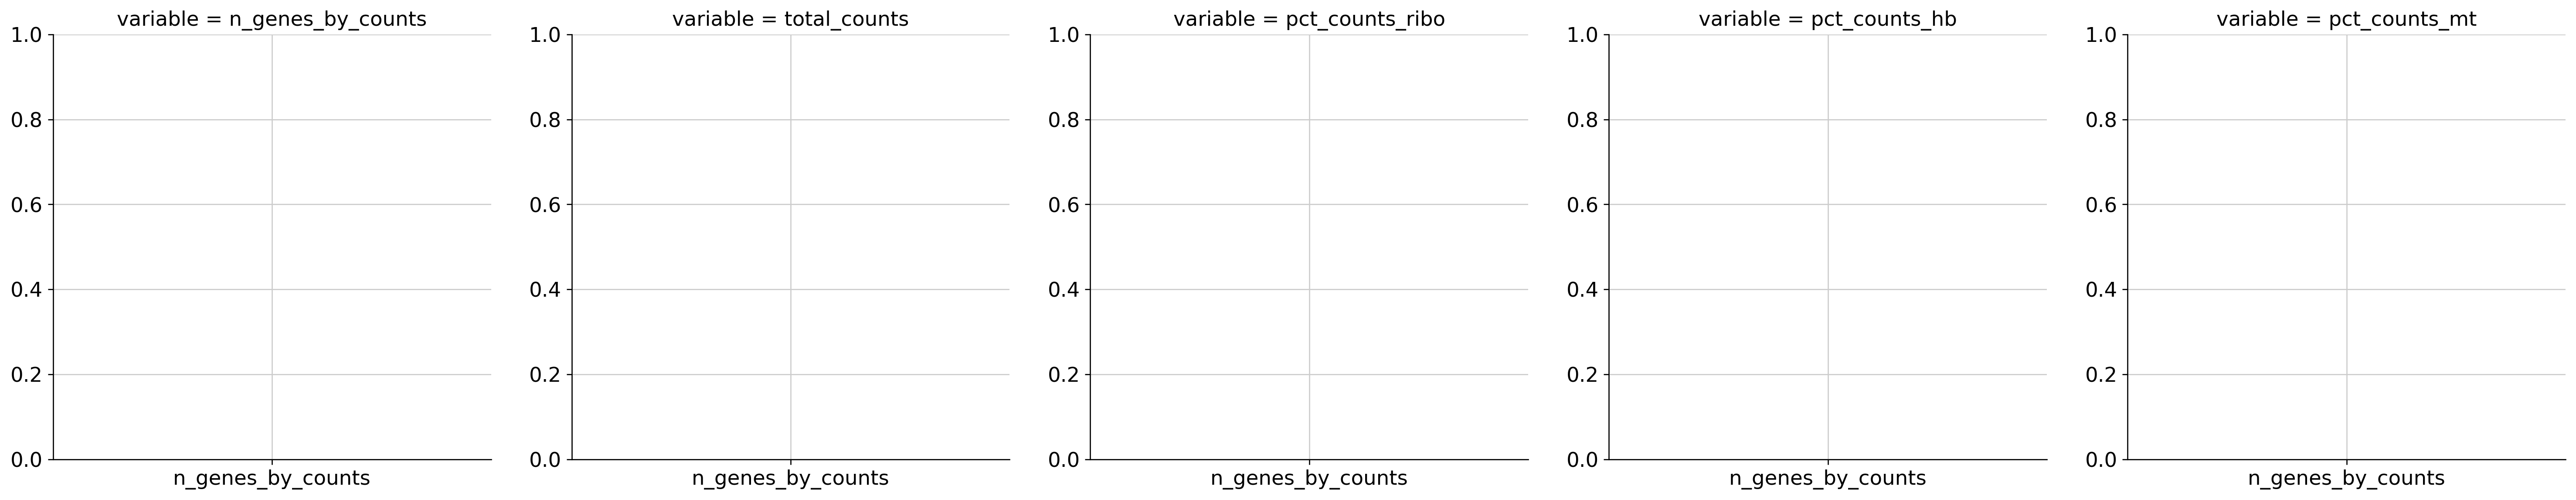

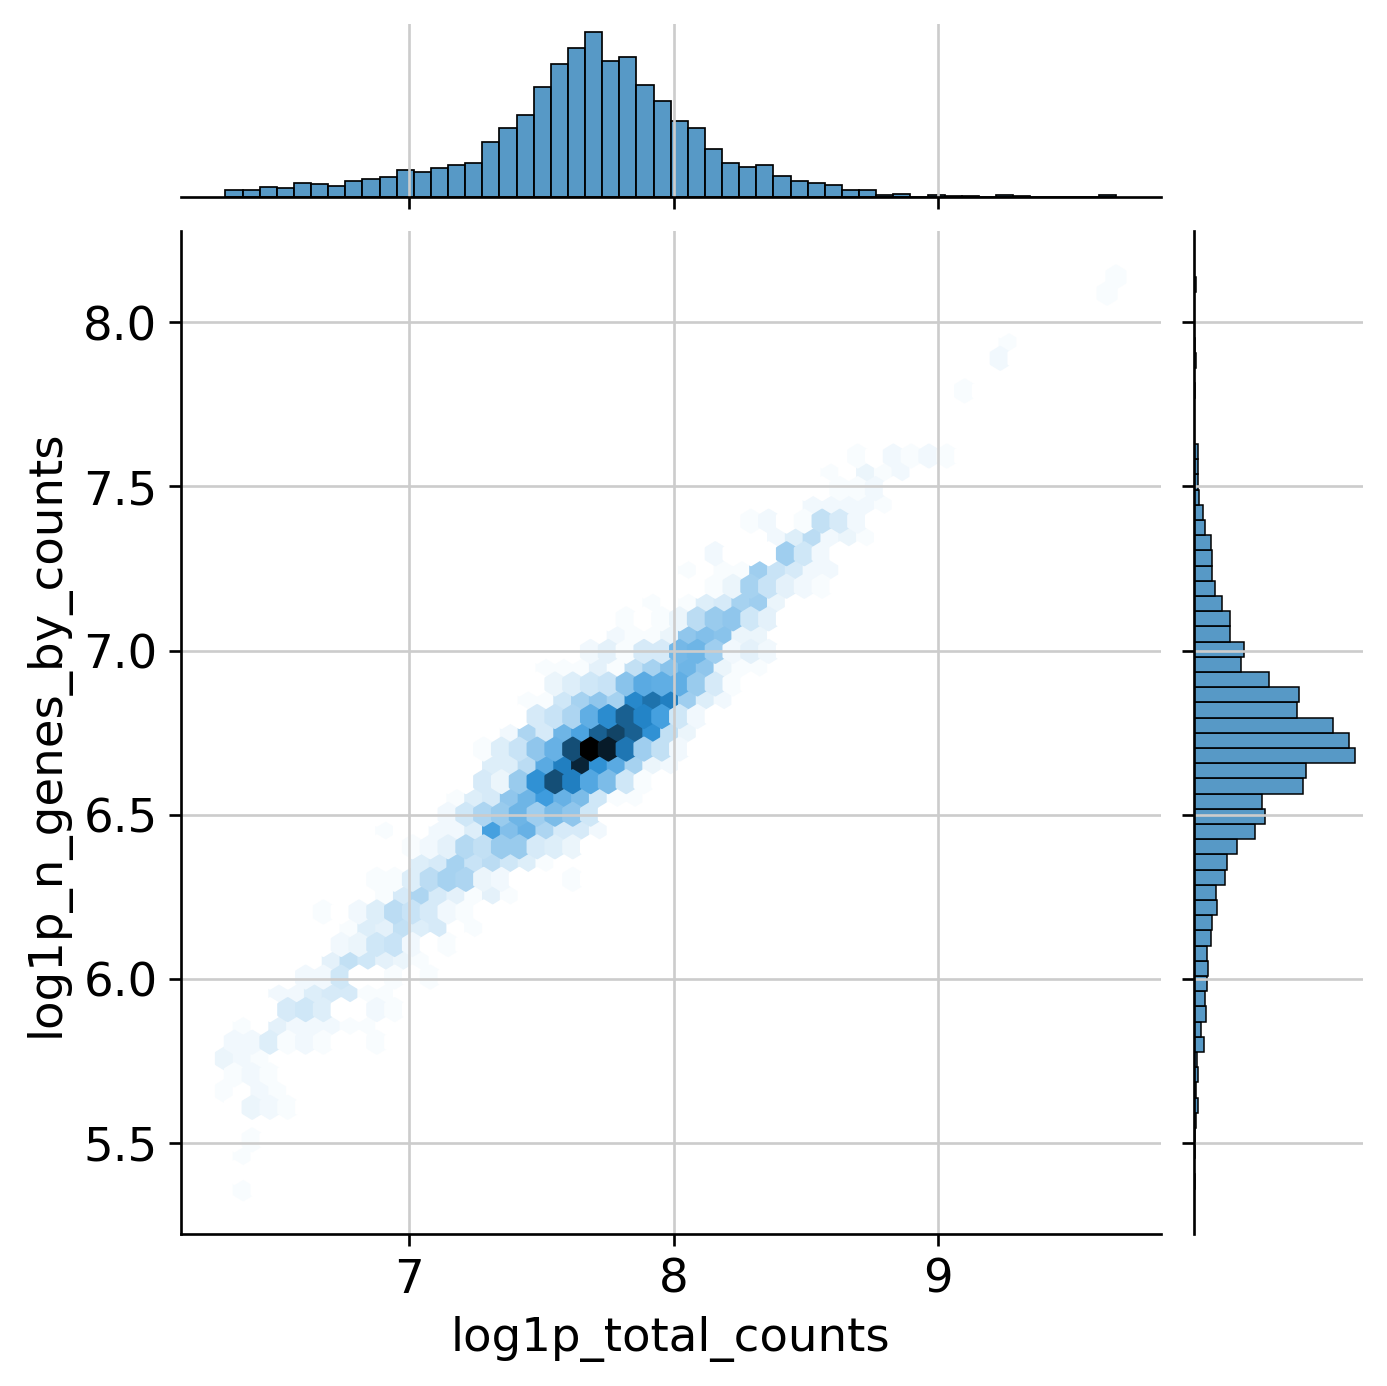

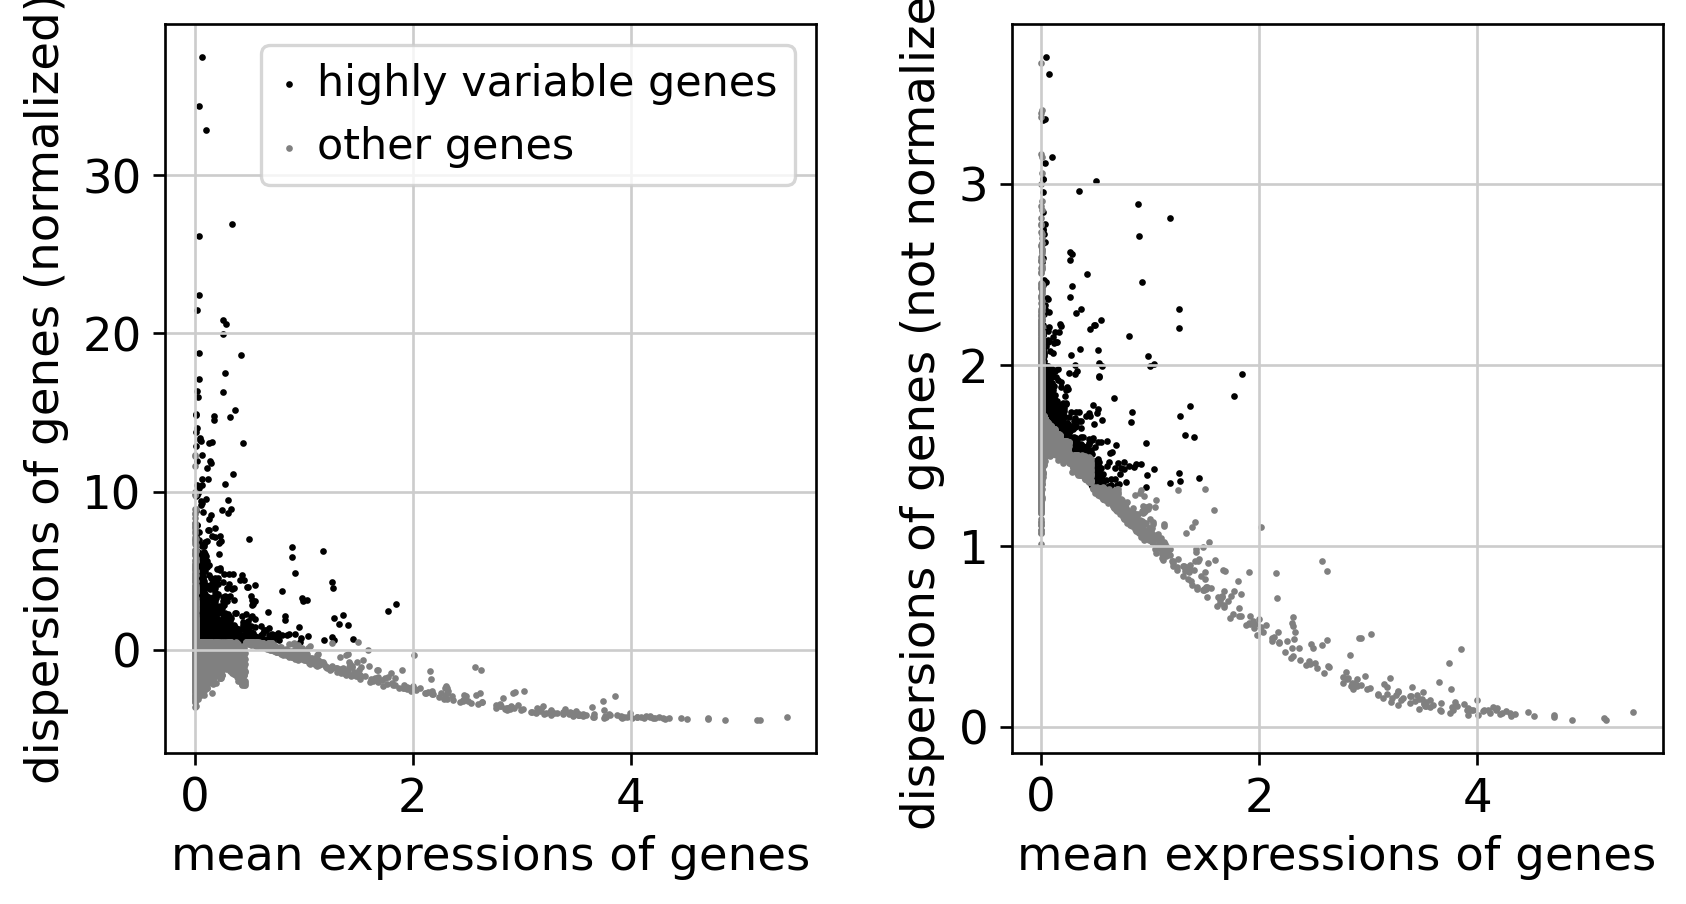


<<< FILTERING BY HIGHLY VARIABLE GENES >>>


Cell Counts: HVGs

2638


Gene Counts: HVGs


<<< REGRESSING OUT CONFOUNDS >>>

	['total_counts', 'pct_counts_mt']

<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Scaling gene expression...

	*** Clipping maximum GEX SD to 10...

	*** Scaling => `.X` & scaled layer...


Cell Counts: Post-Processing

2638


Gene Counts: Post-Processing


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


Traceback (most recent call last):
  File "/home/elizabeth/elizabeth/crispr/crispr/processing/preprocessing.py", line 538, in perform_qc
    figs["metrics_violin"] = sc.pl.violin(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/scanpy/plotting/_anndata.py", line 795, in violin
    g = sns.catplot(
  File "/home/elizabeth/elizabeth/miniconda3/envs/py-bio/lib/python3.10/site-packages/seaborn/categorical.py", line 2932, in catplot
    p.plot_violins(
  File "/home/elizab

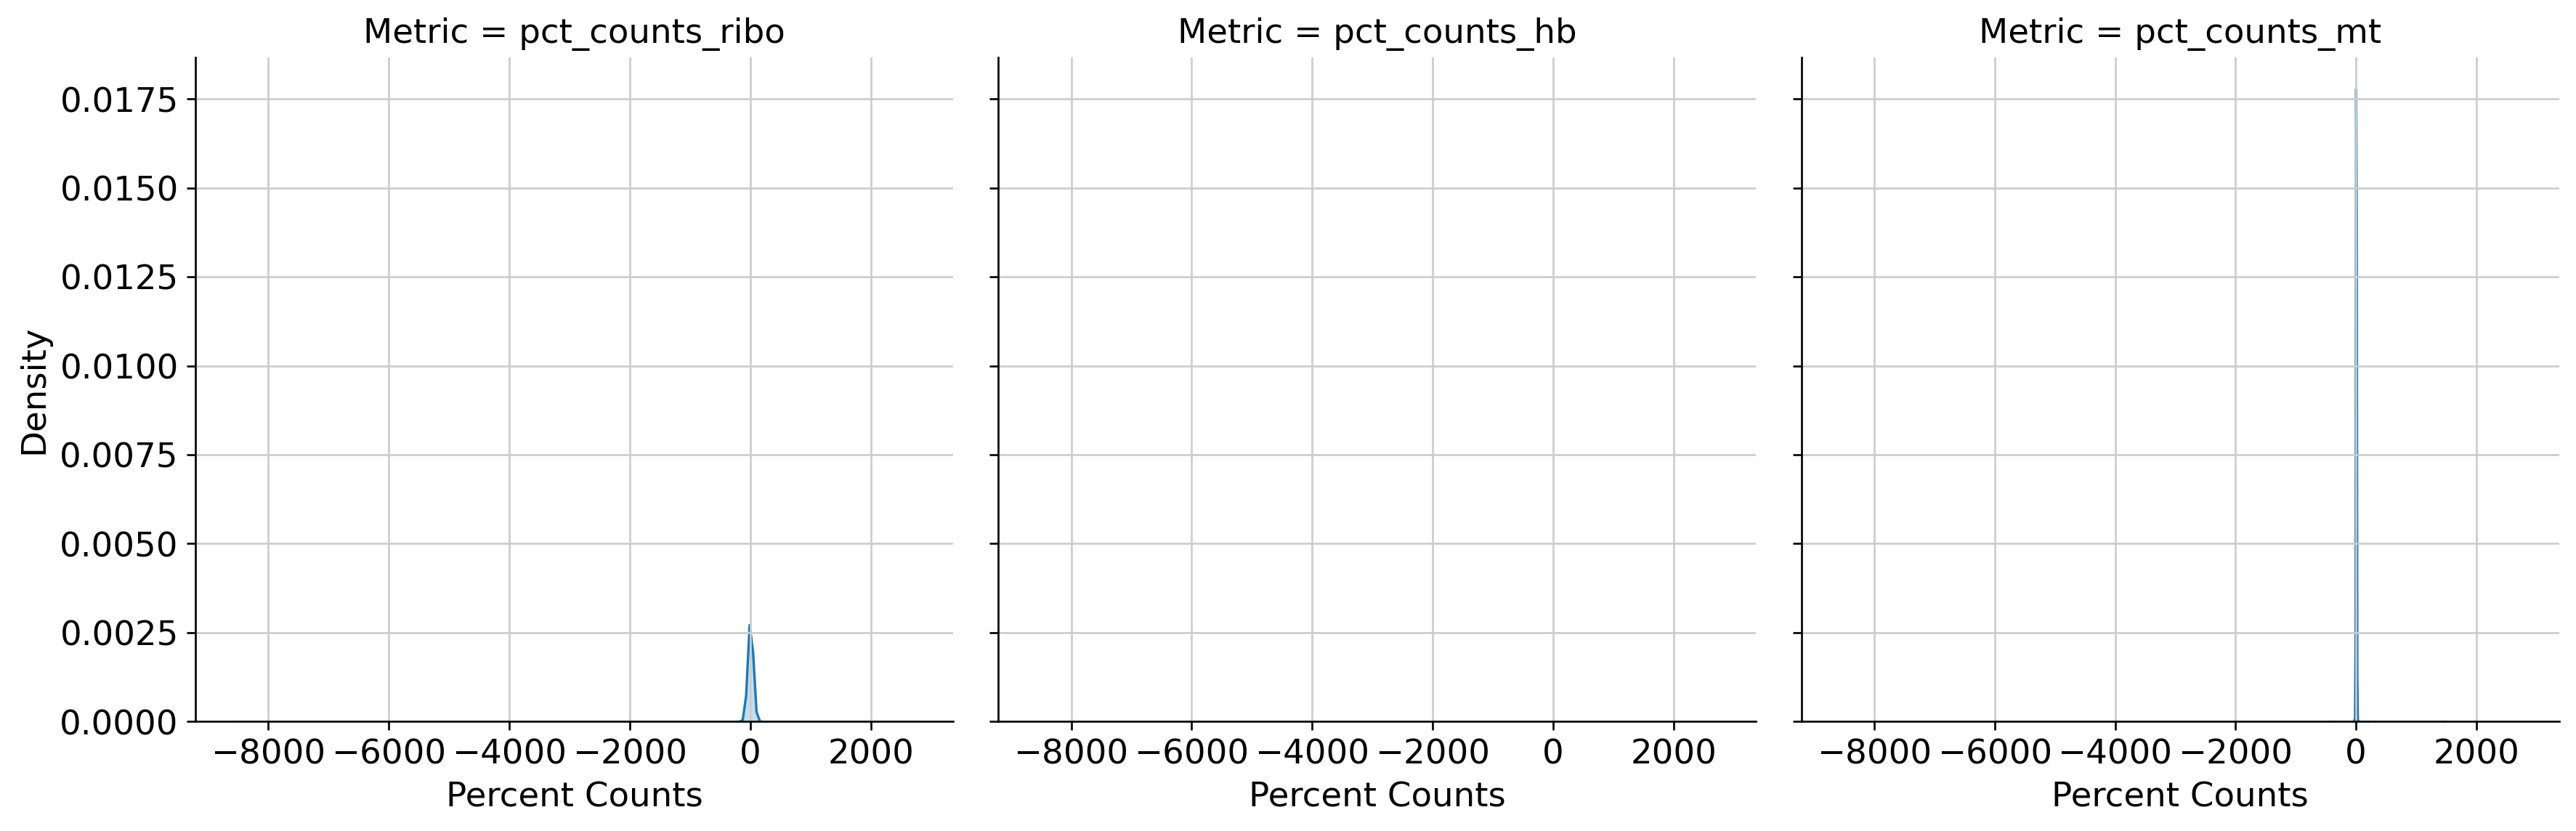

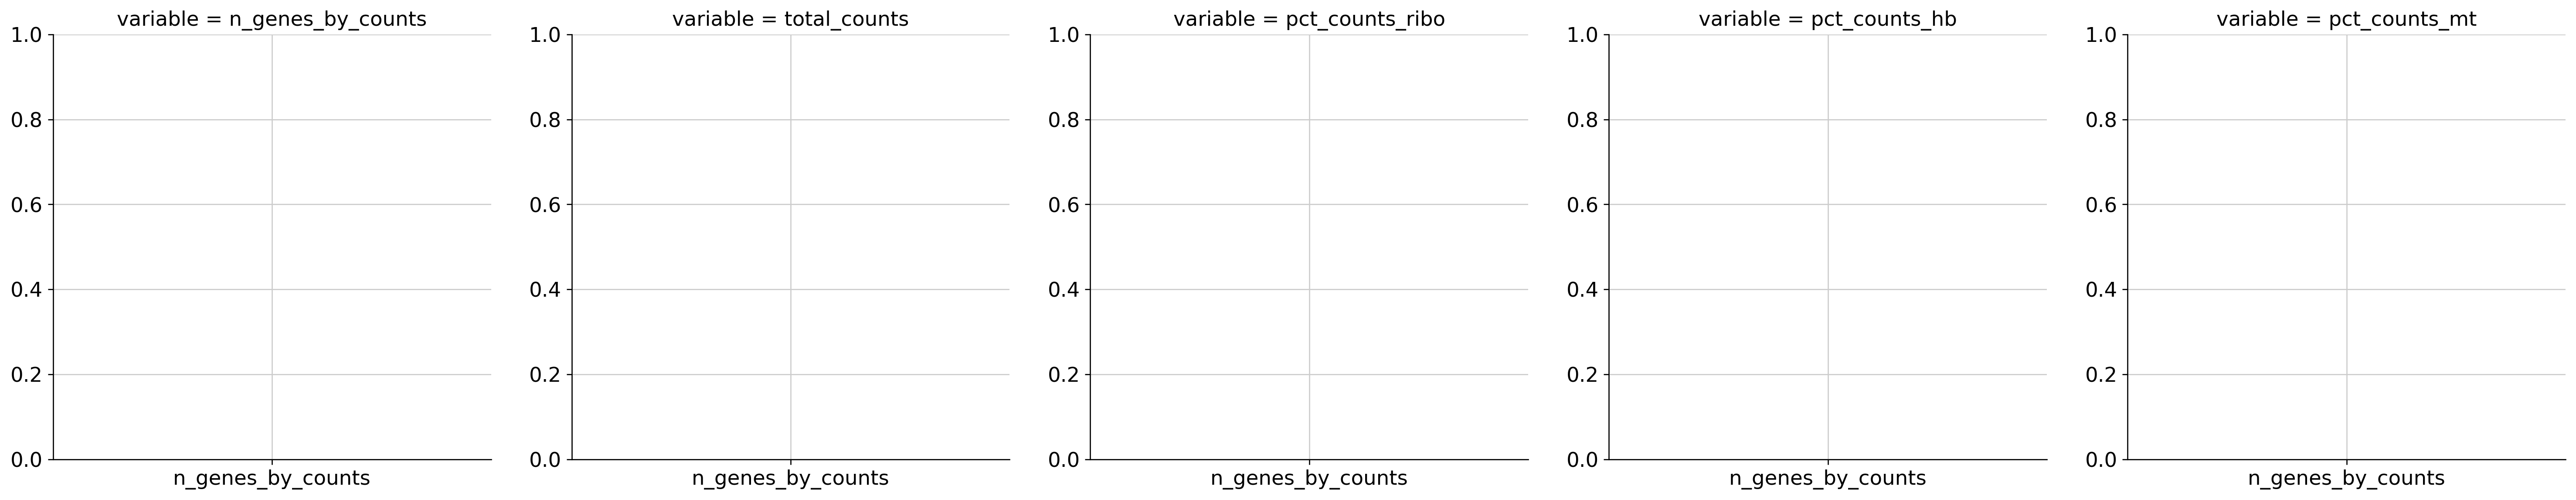

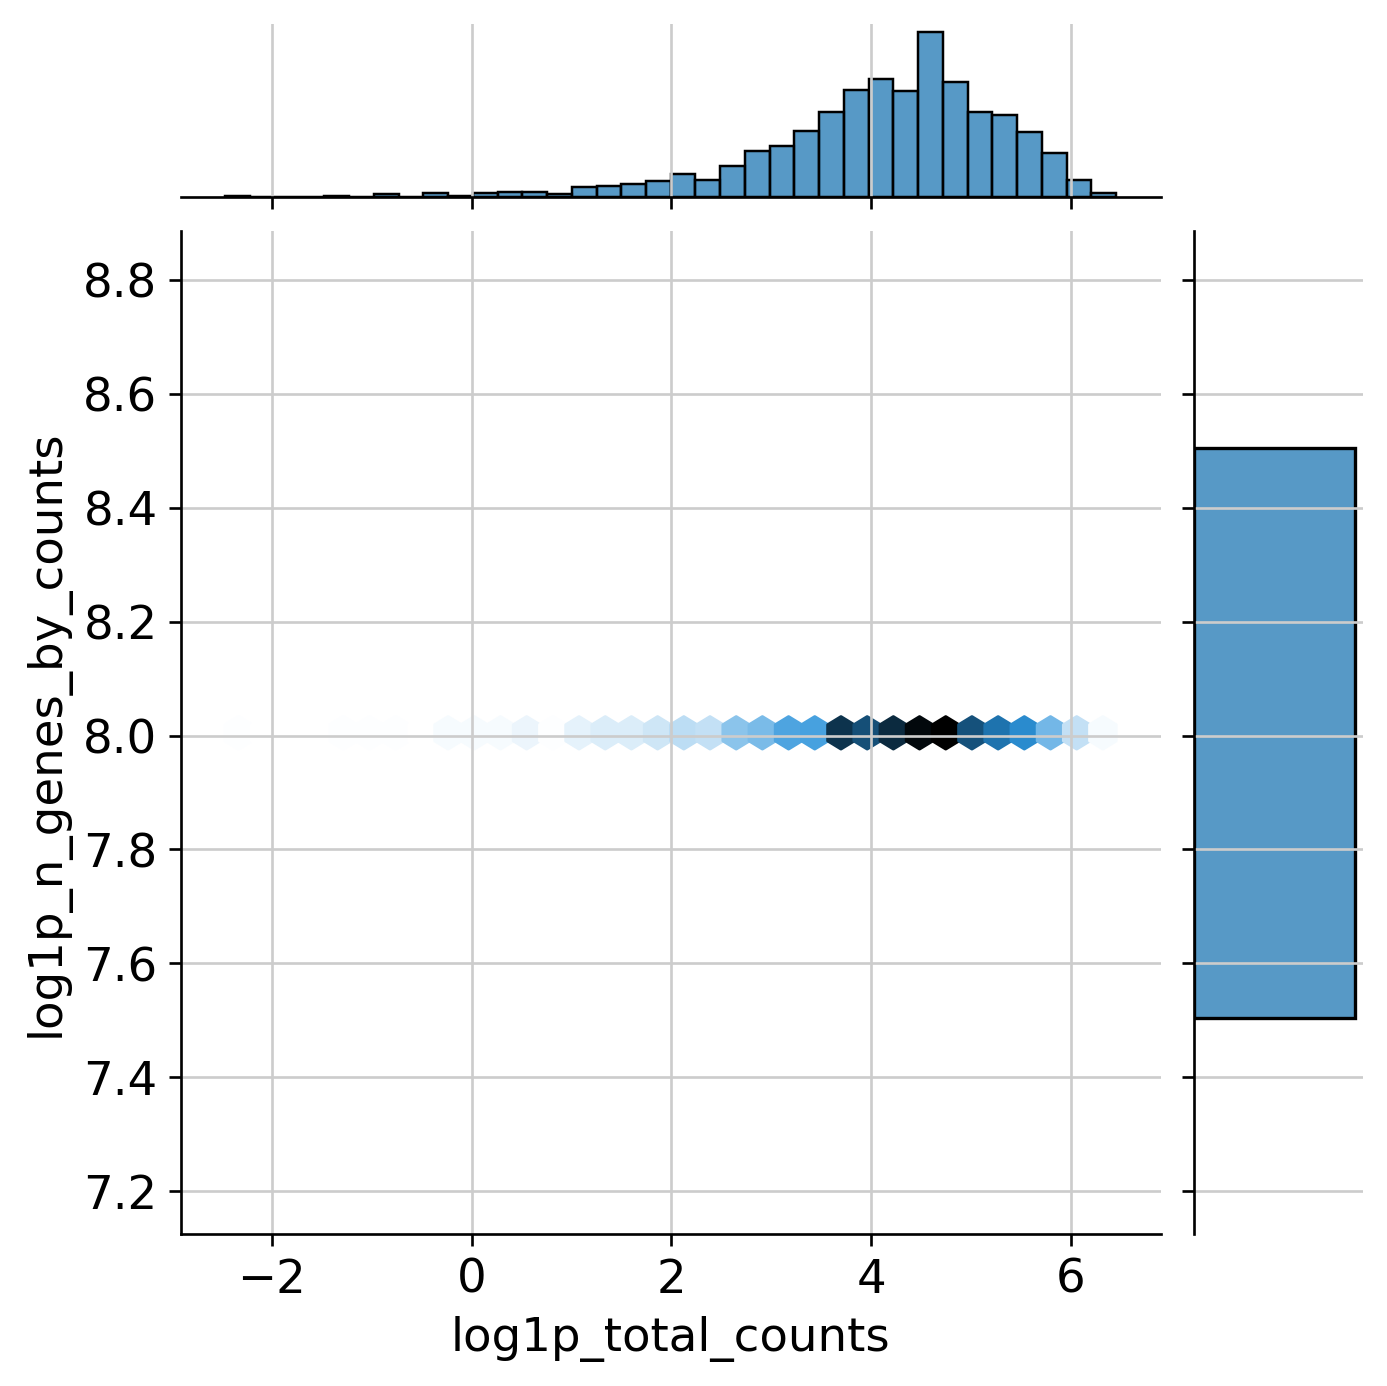

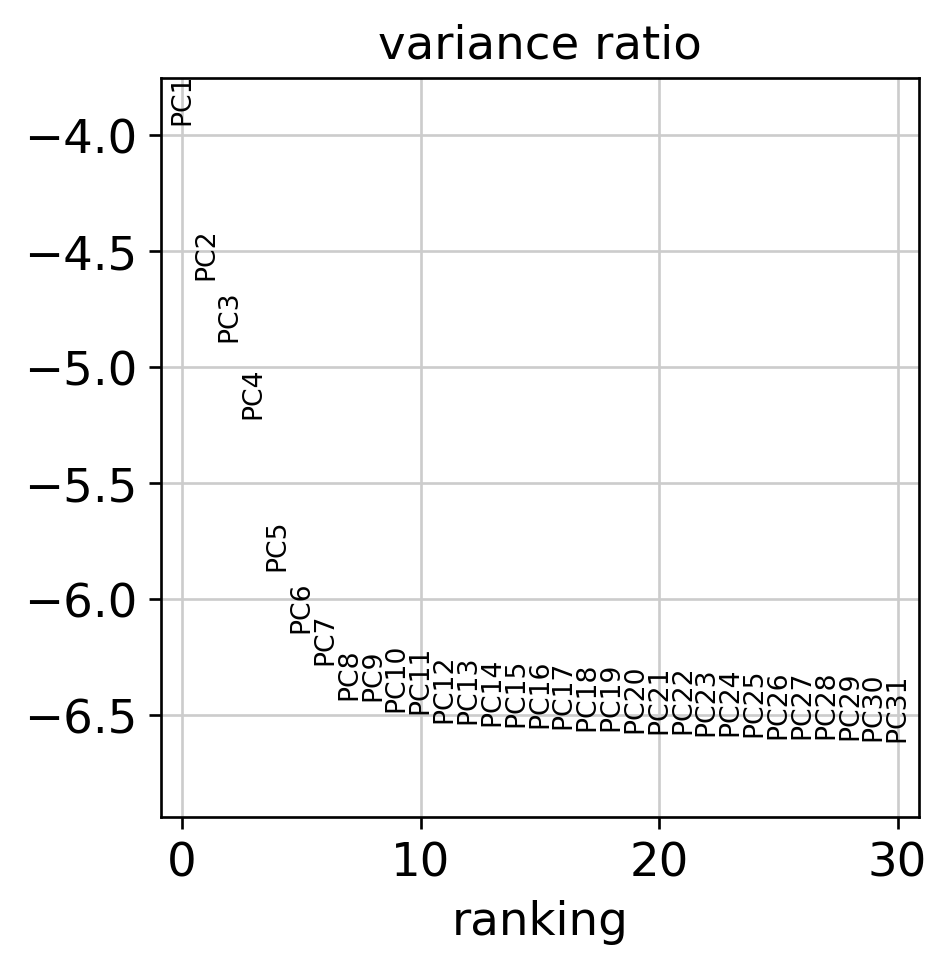

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'kws_hvg' as categorical
... storing 'target_sum' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'regress_out' as categorical
... storing 'seed' as categorical
... storing 'kws_scale' as categorical


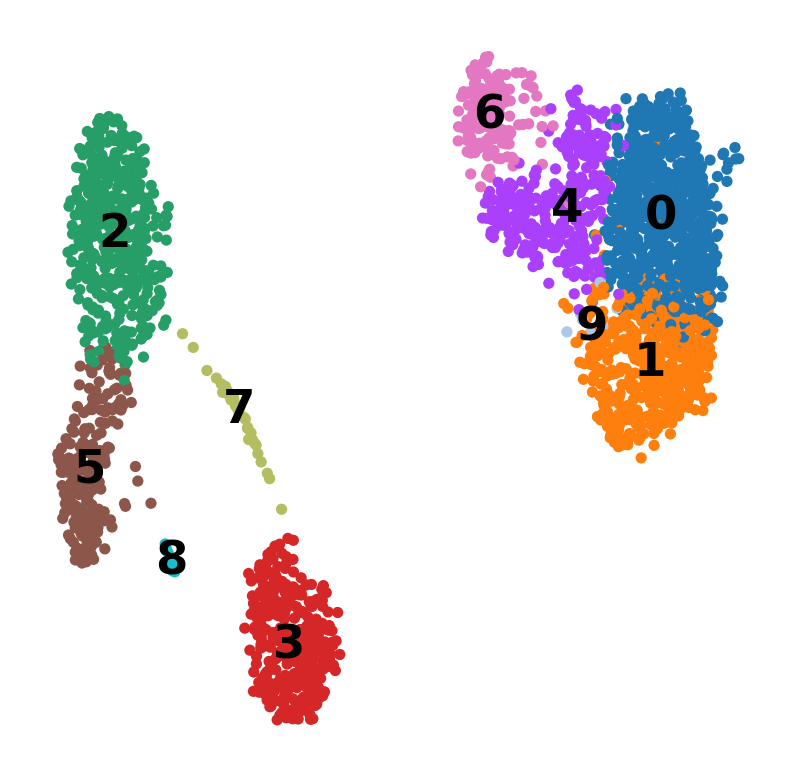

... storing 'method_cluster' as categorical
... storing 'kws_pca' as categorical
... storing 'kws_neighbors' as categorical
... storing 'kws_umap' as categorical
... storing 'kws_cluster' as categorical
... storing 'resolution' as categorical


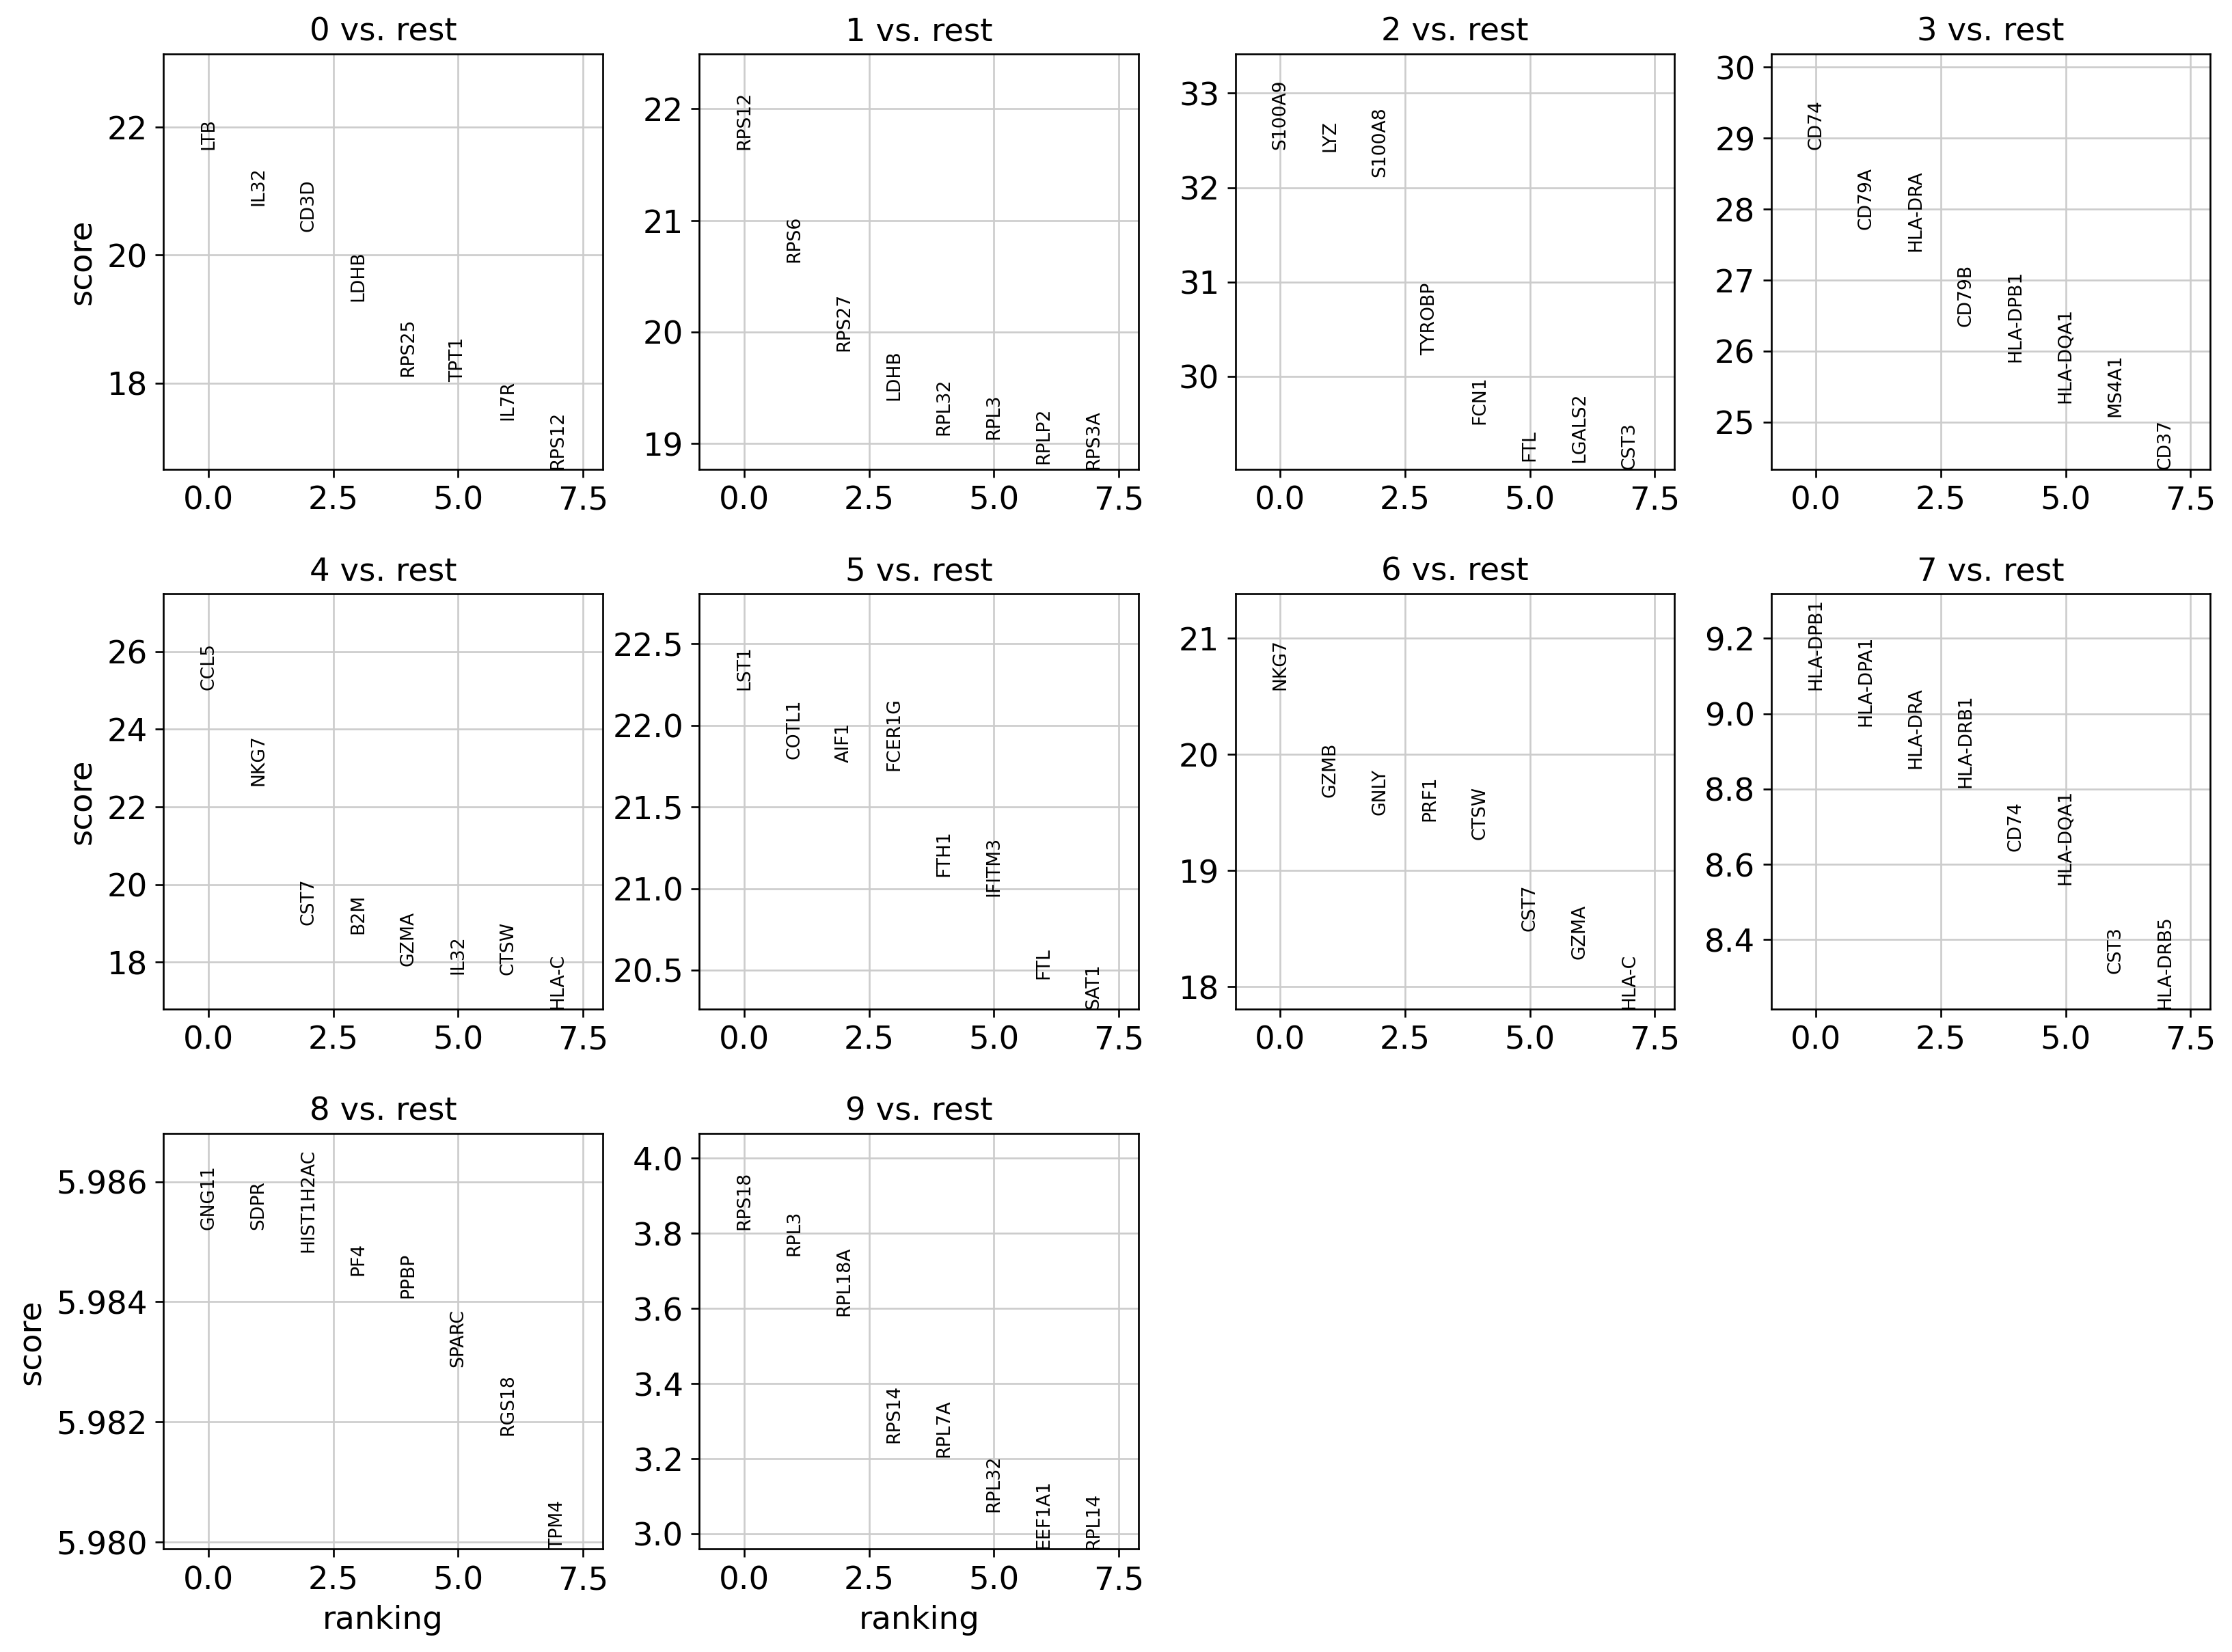

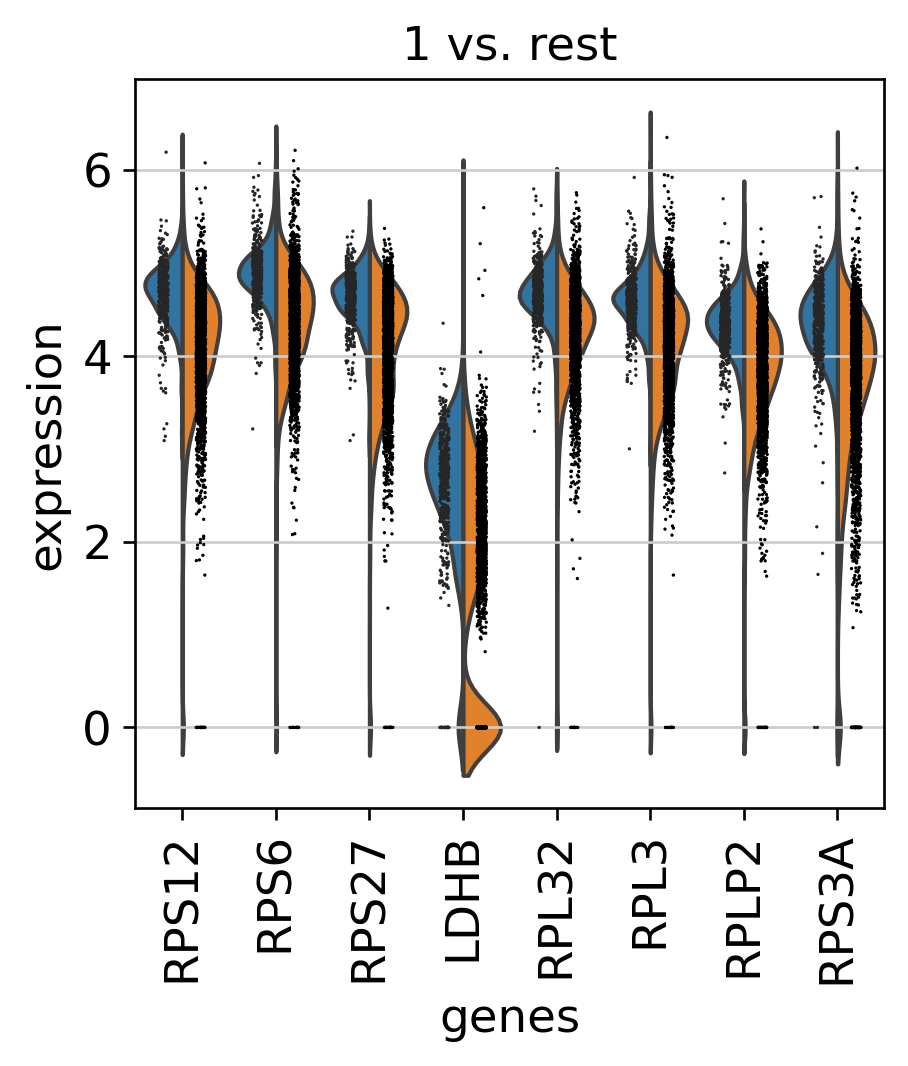

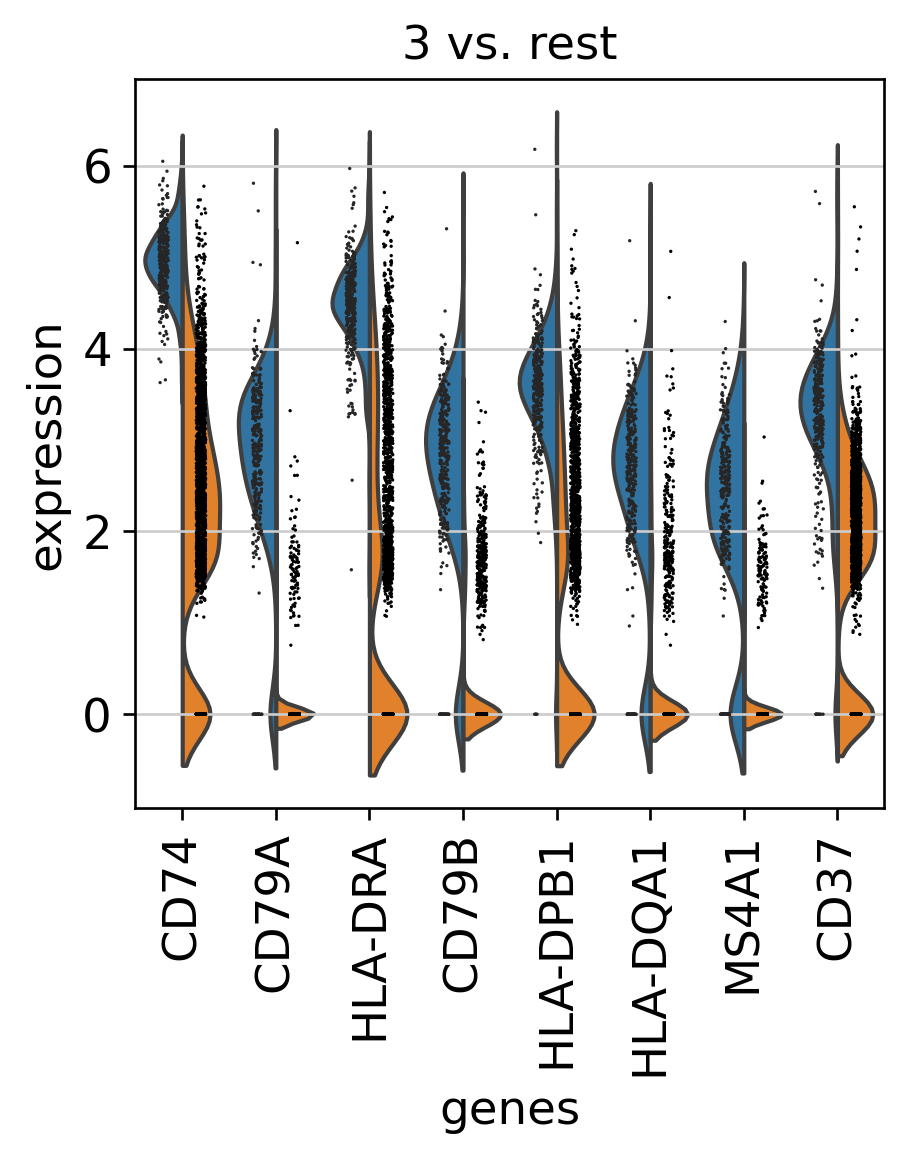

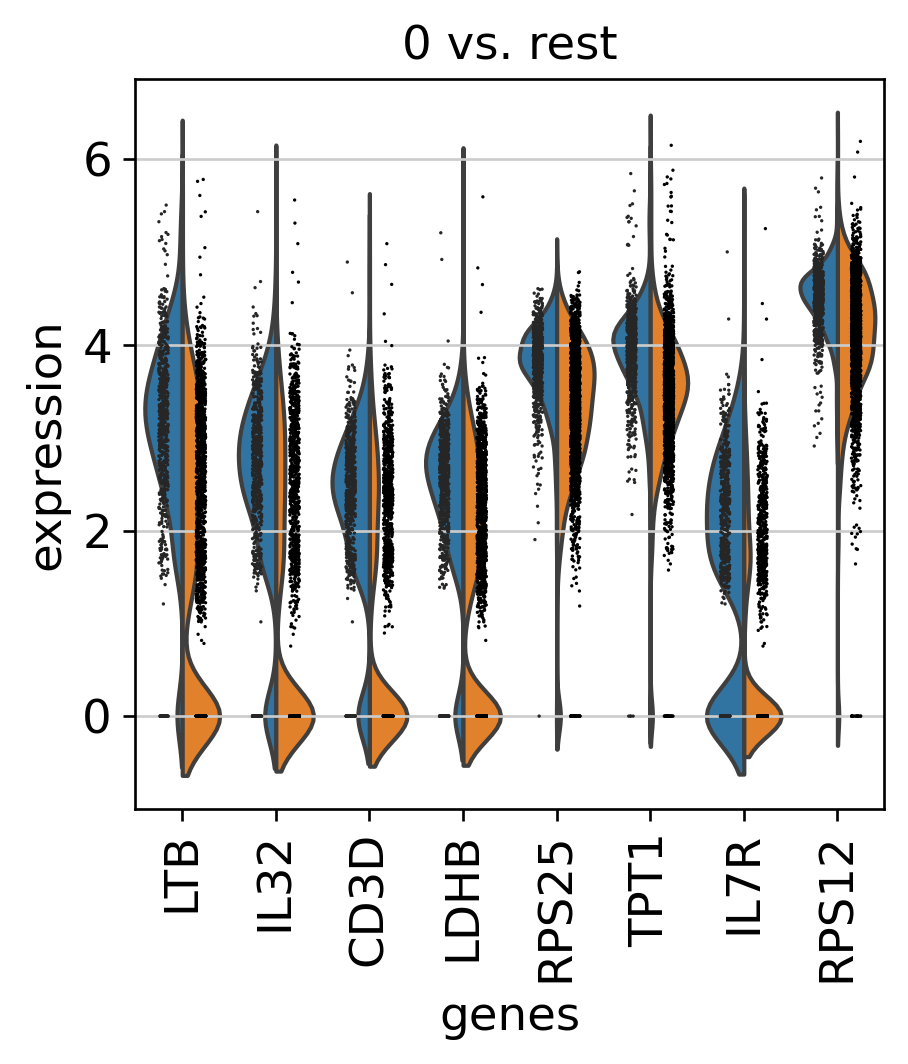

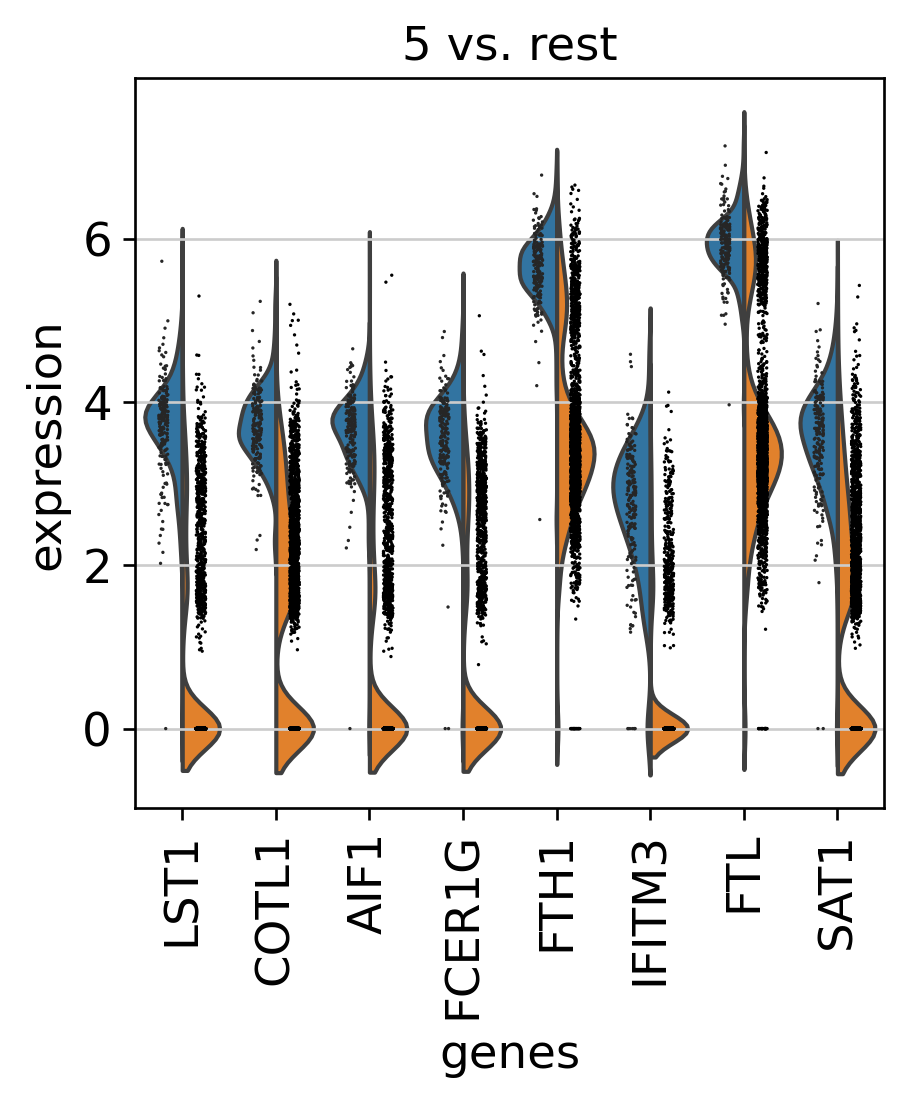

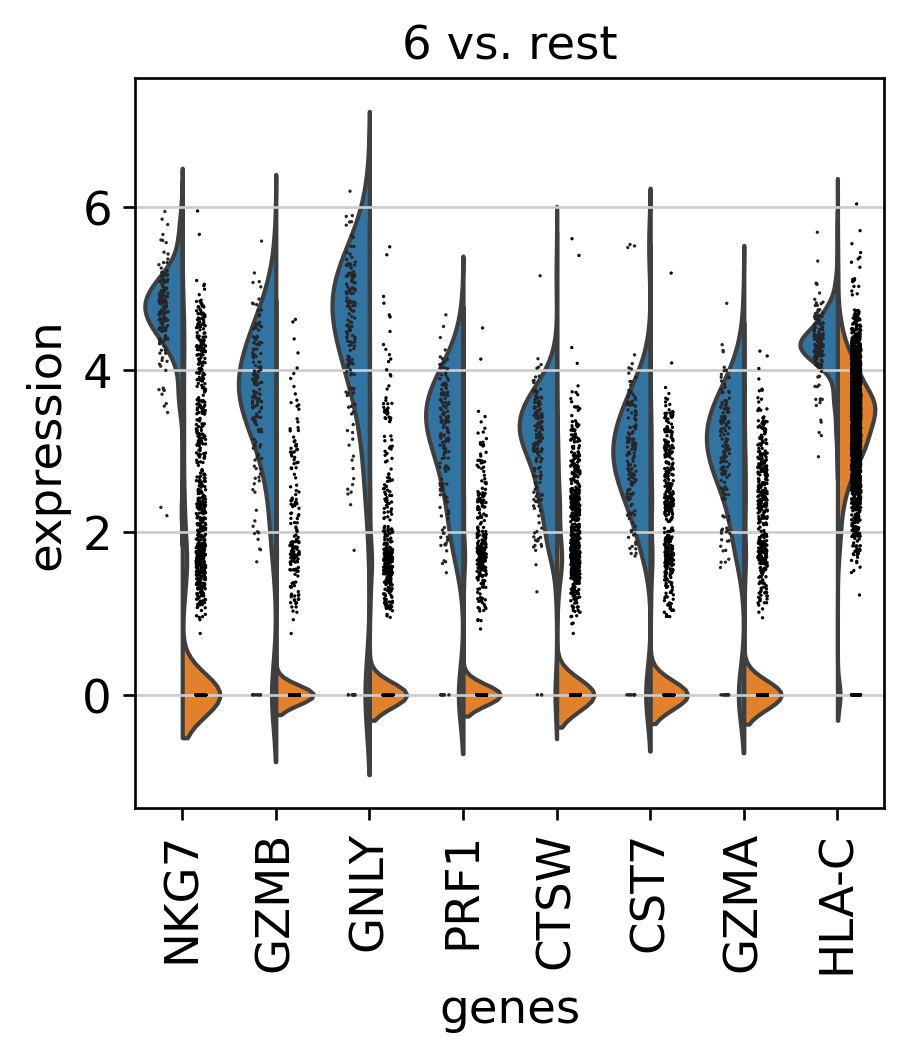

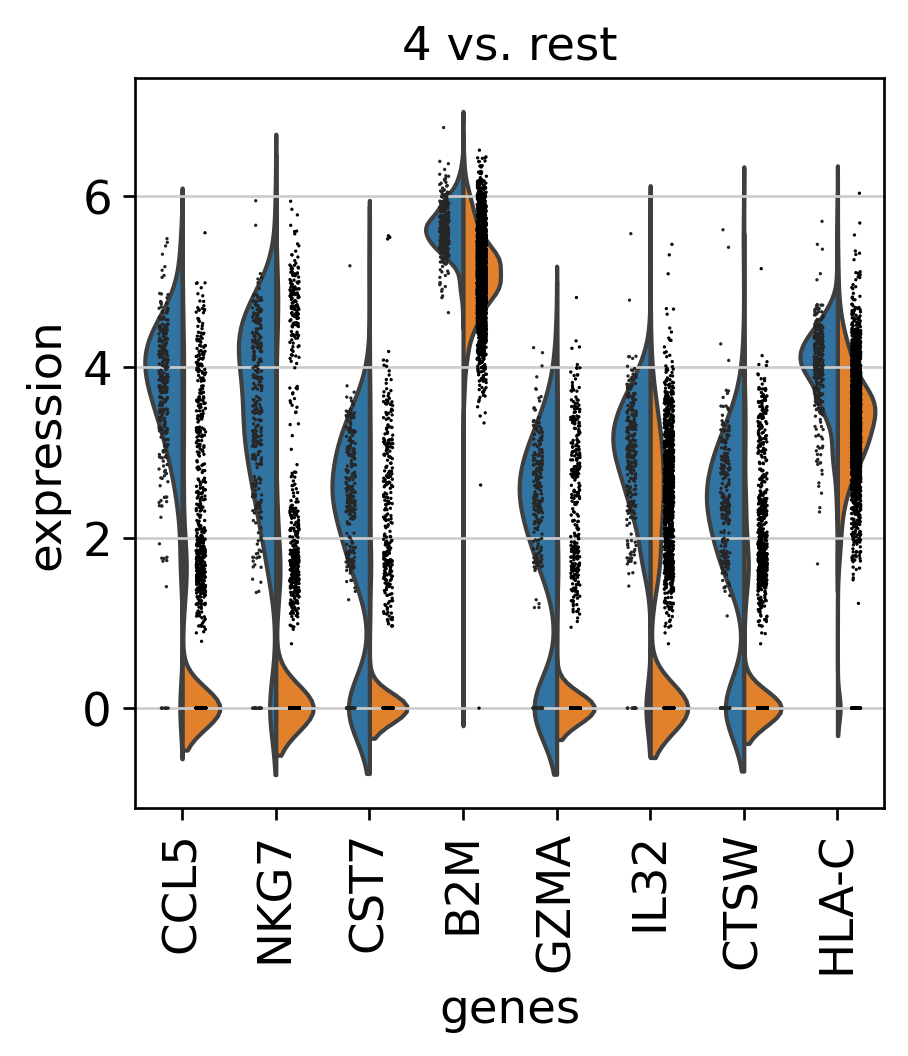

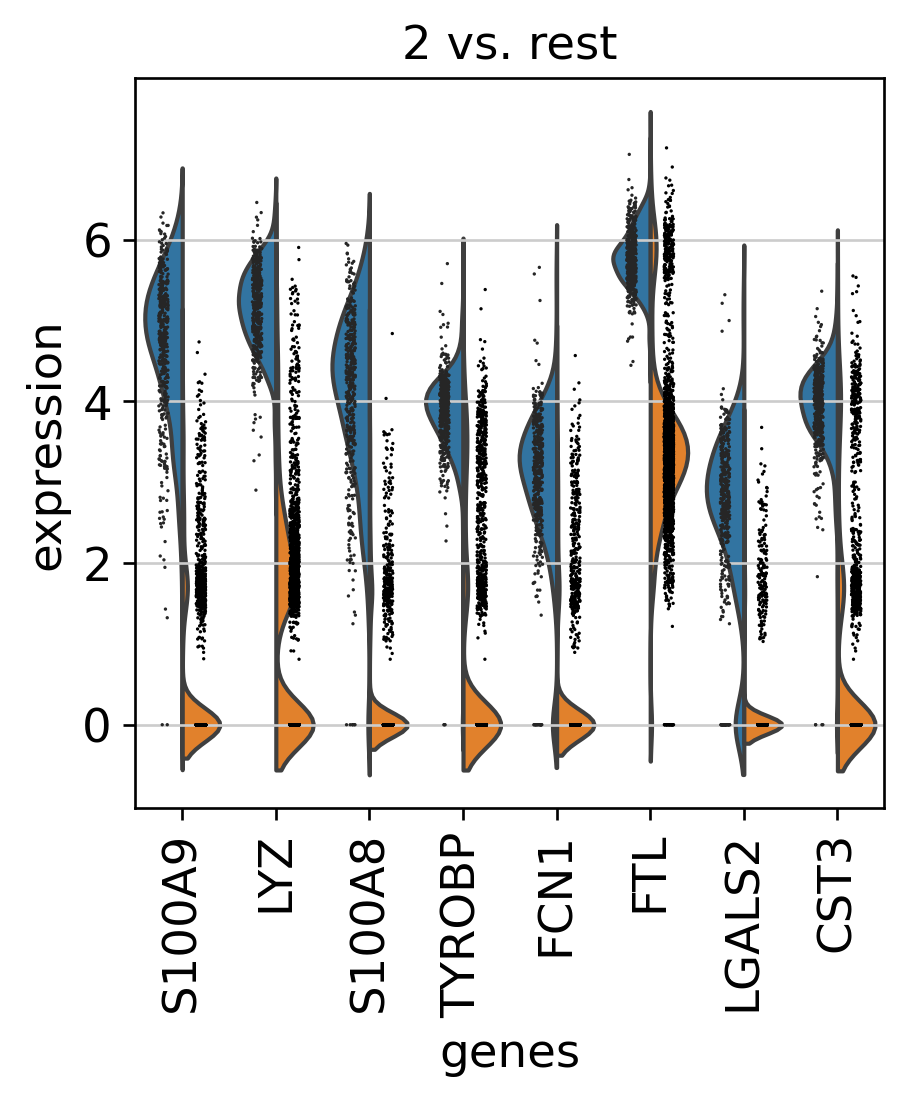

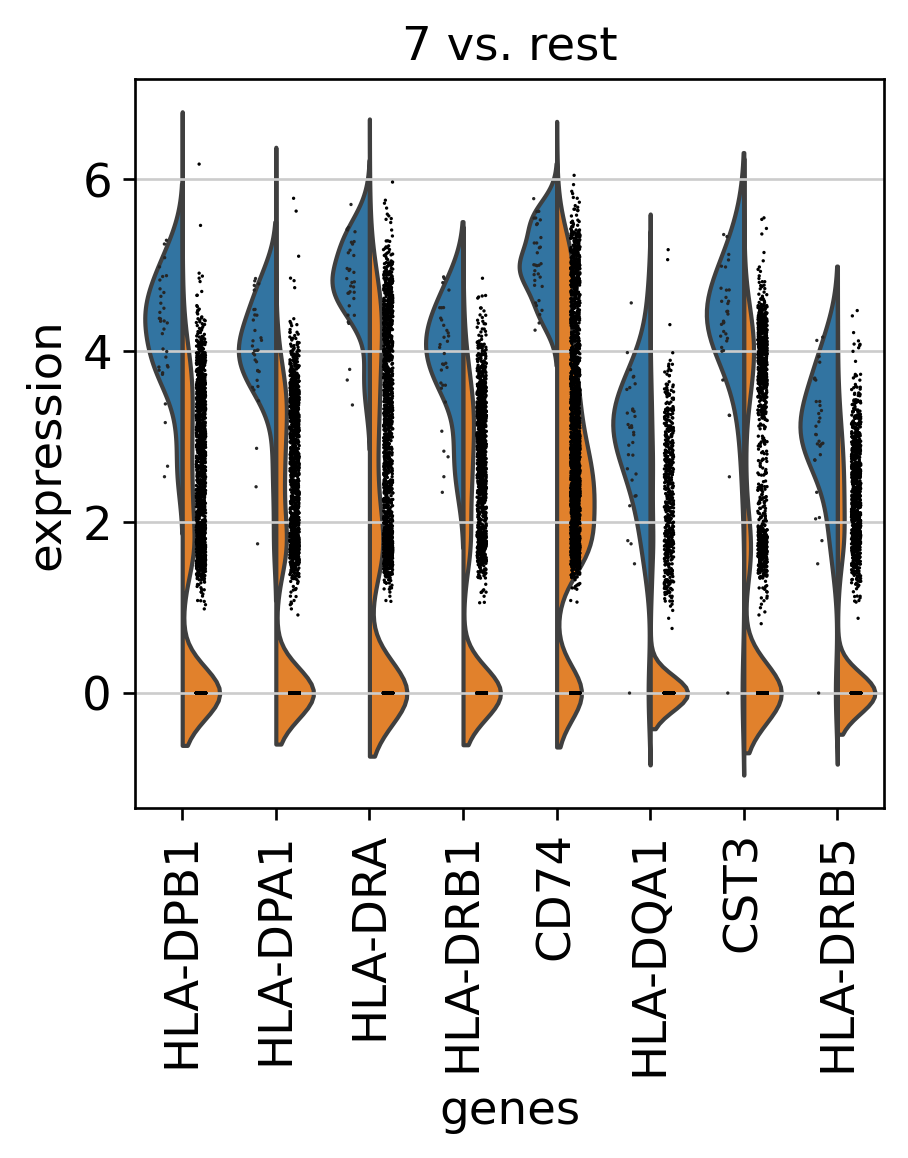

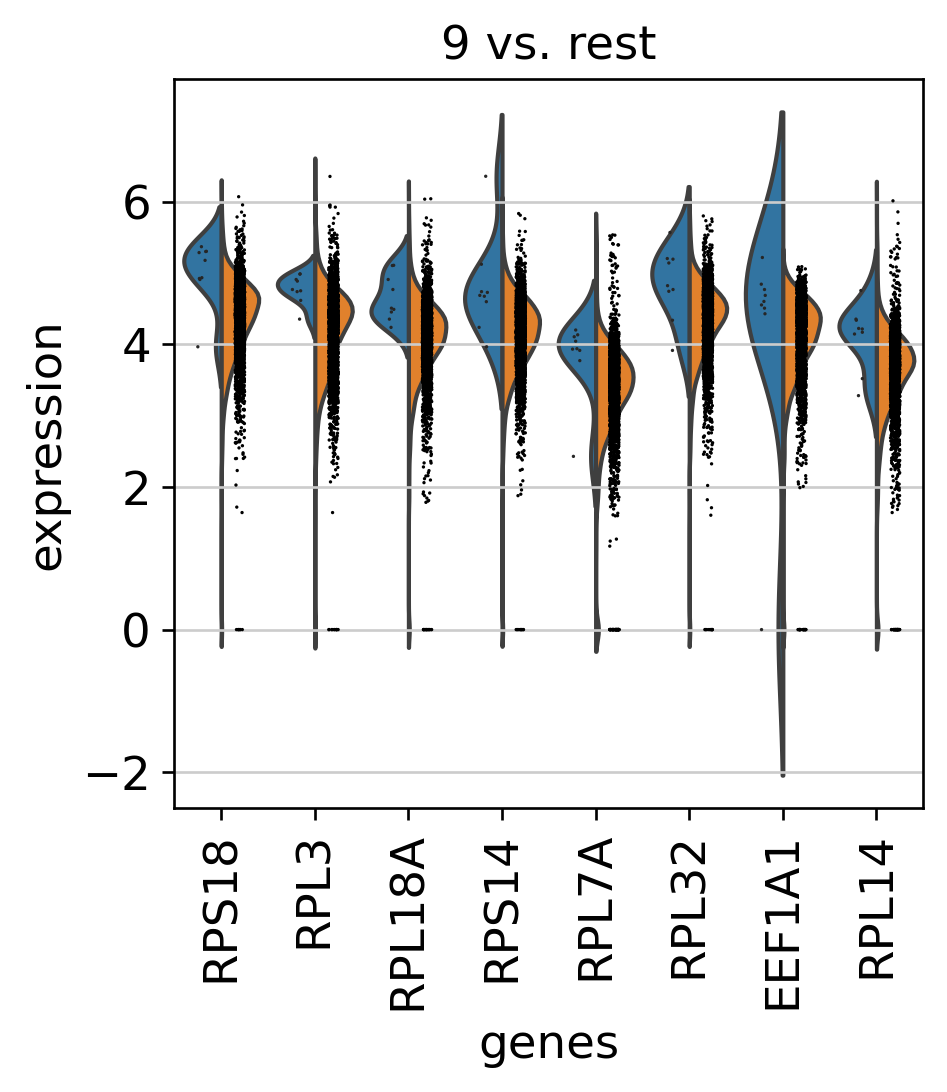

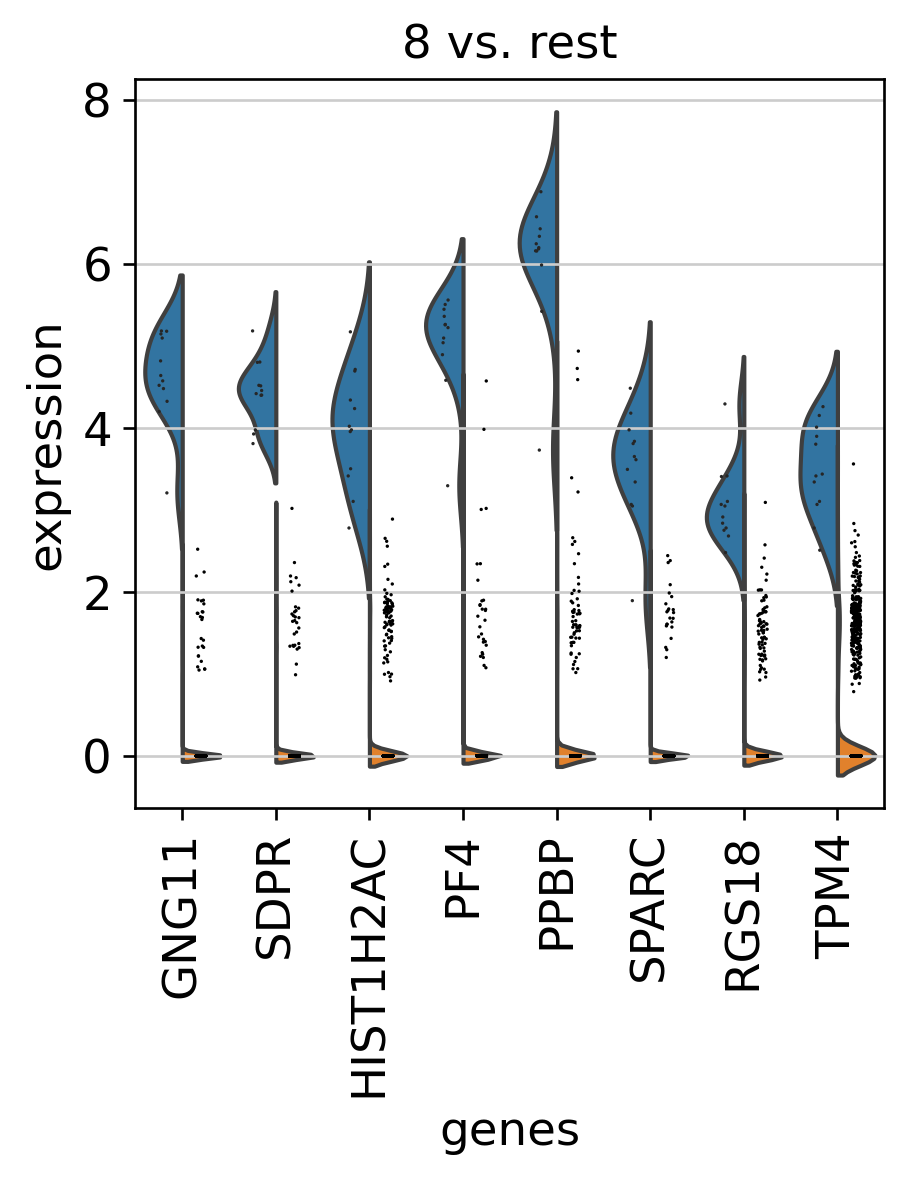

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 2638 cells and 2994 genes
🔗 Matching reference genes in the model


                 scores  logfoldchanges          pvals      pvals_adj
leiden names                                                         
0      LTB    21.647890        2.320467  6.362607e-104  8.688776e-100
       IL32   20.778515        2.452591   6.772046e-96   4.623953e-92
       CD3D   20.366077        2.351449   3.344148e-92   1.522256e-88
                 scores  logfoldchanges          pvals     pvals_adj
leiden names                                                        
1      RPS12  21.635160        0.877650  8.385542e-104  1.145130e-99
       RPS6   20.627743        0.770533   1.547077e-94  1.056344e-90
       RPS27  19.828028        0.849360   1.705959e-87  7.765525e-84
                  scores  logfoldchanges          pvals      pvals_adj
leiden names                                                          
2      S100A9  32.403500        7.375642  2.450282e-230  3.007069e-226
       LYZ     32.385418        6.198151  4.404026e-230  3.007069e-226
       S100A8  32.116

🧬 1178 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


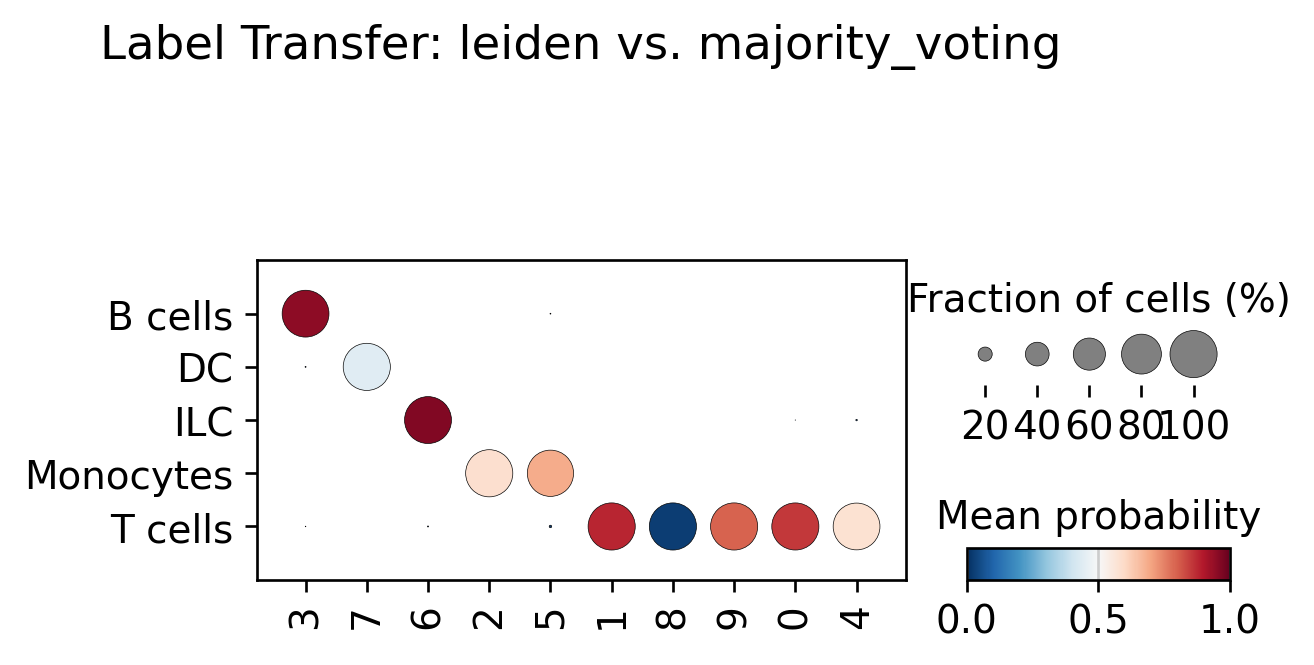

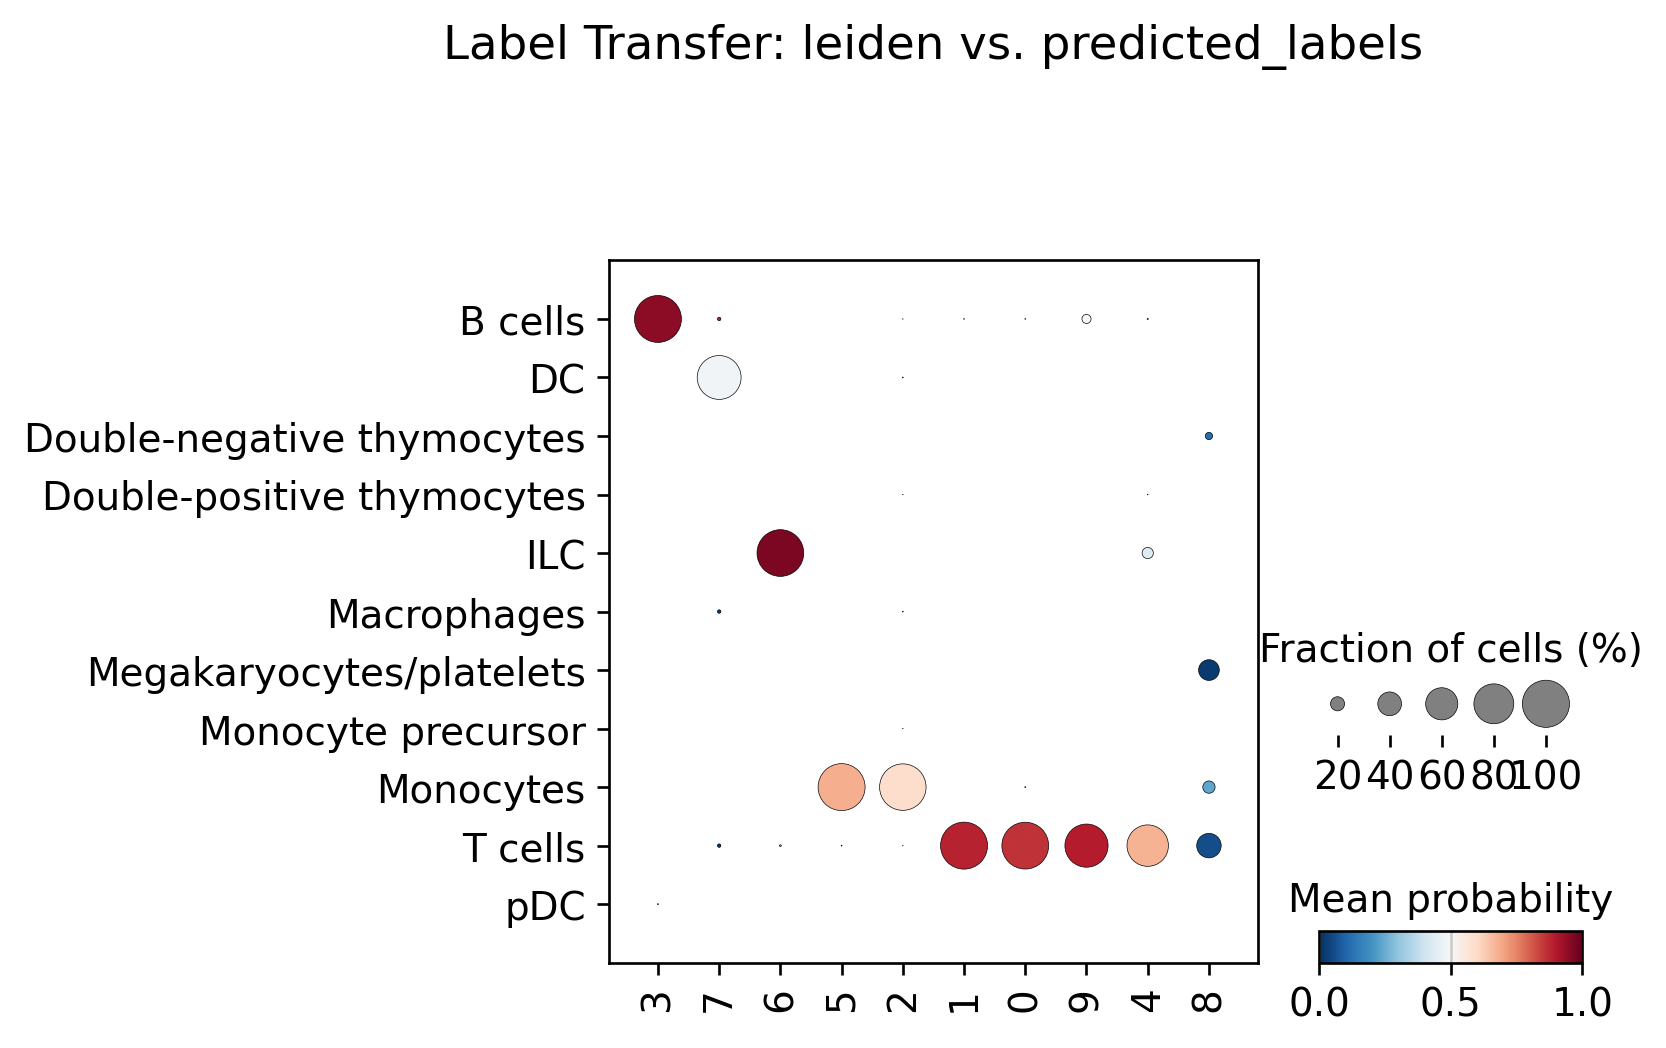

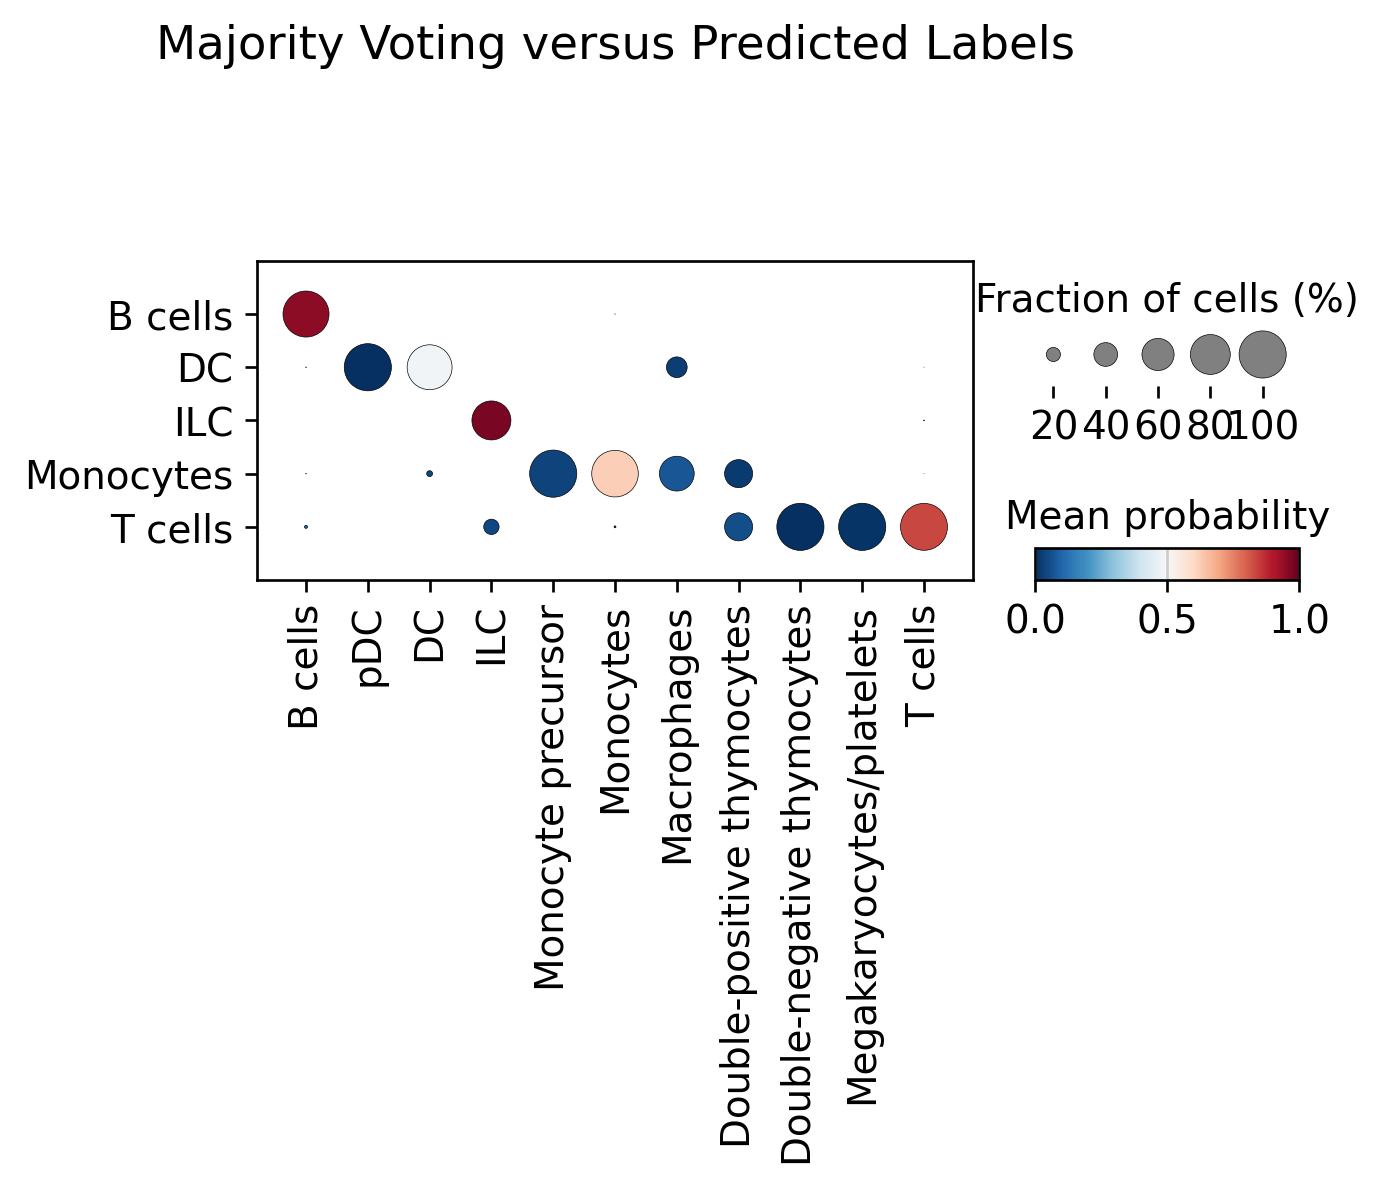

... storing 'method_cluster' as categorical
... storing 'kws_pca' as categorical
... storing 'kws_neighbors' as categorical
... storing 'kws_umap' as categorical
... storing 'kws_cluster' as categorical
... storing 'resolution' as categorical


None {'vcenter': 0, 'cmap': 'coolwarm'} {'vcenter': 0, 'cmap': 'coolwarm'} None

<<< PLOTTING GEX (Heatmap) >>>

<<< PLOTTING GEX (Violin) >>>


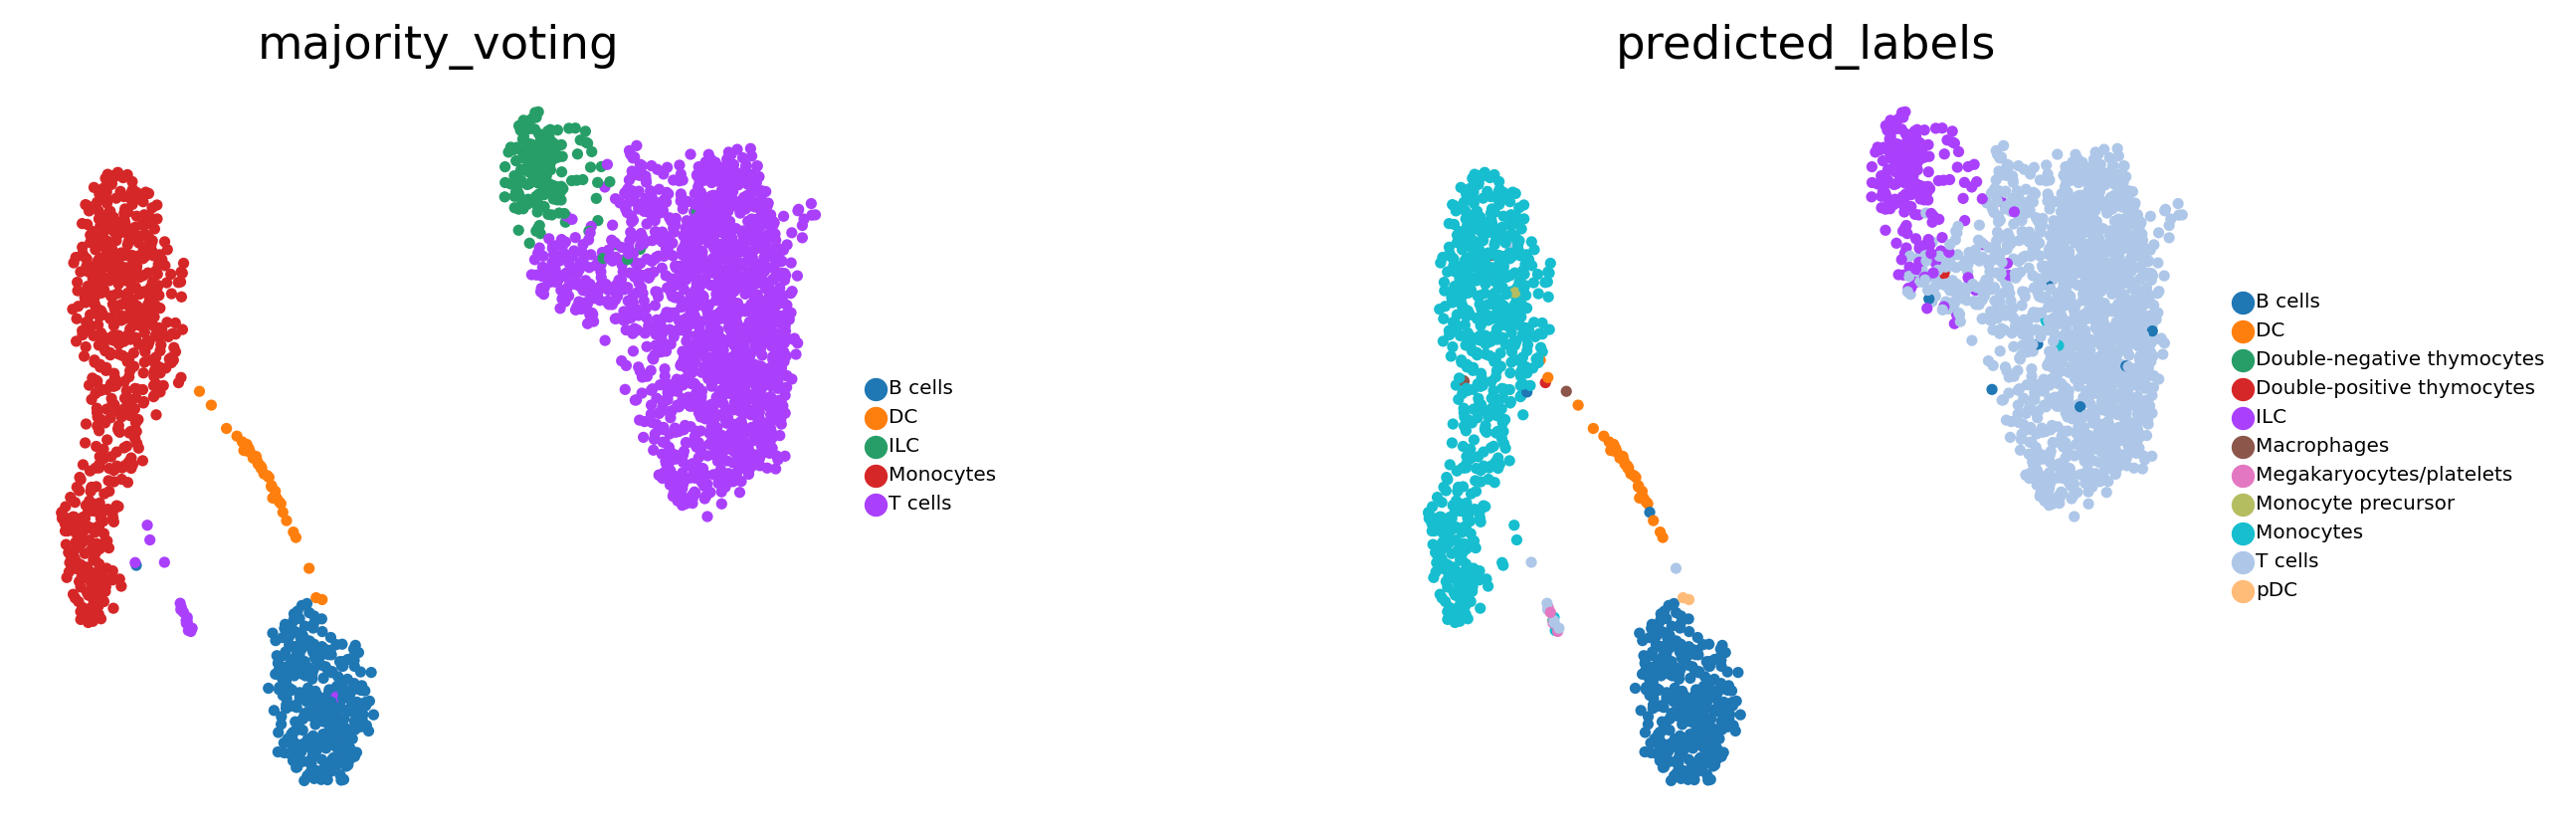

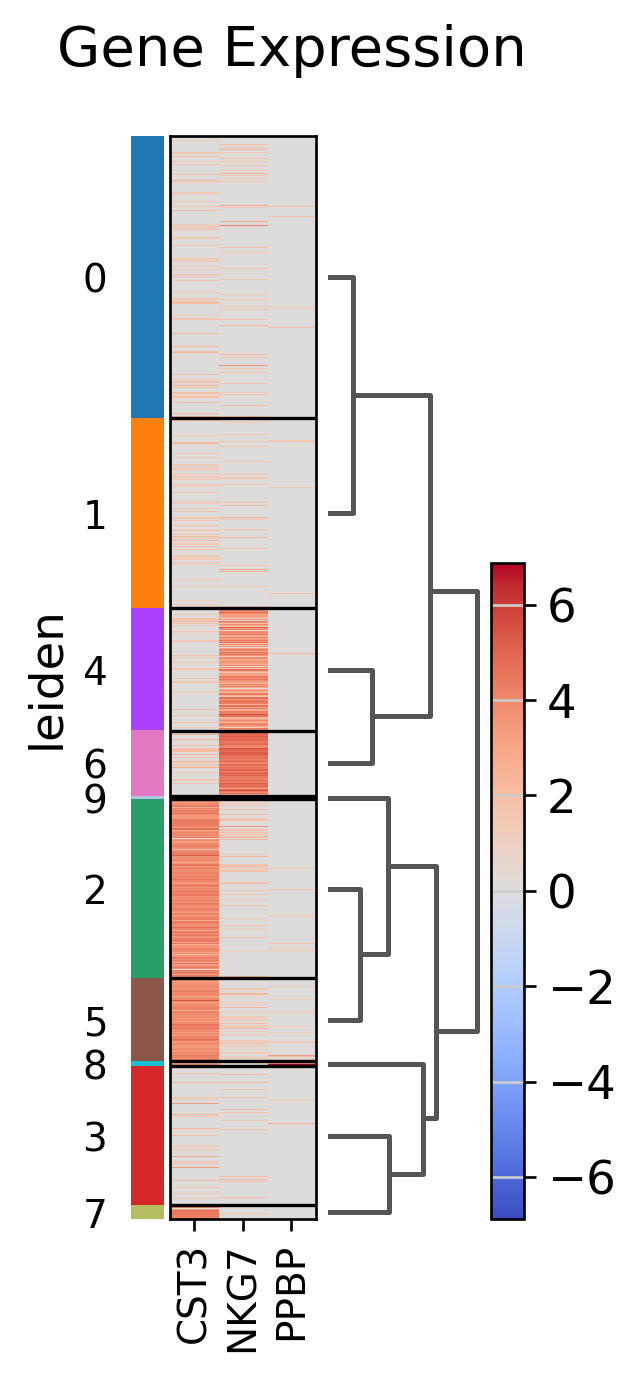

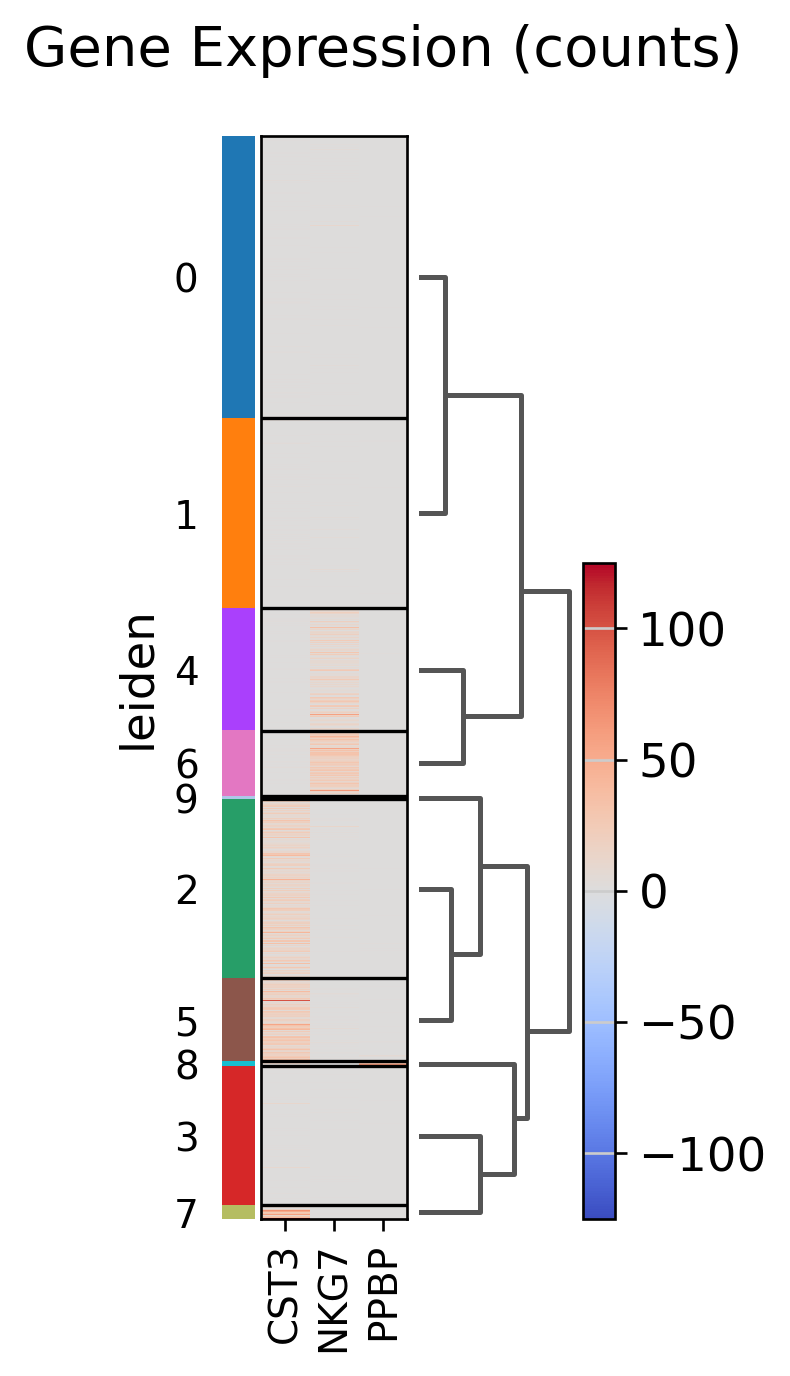

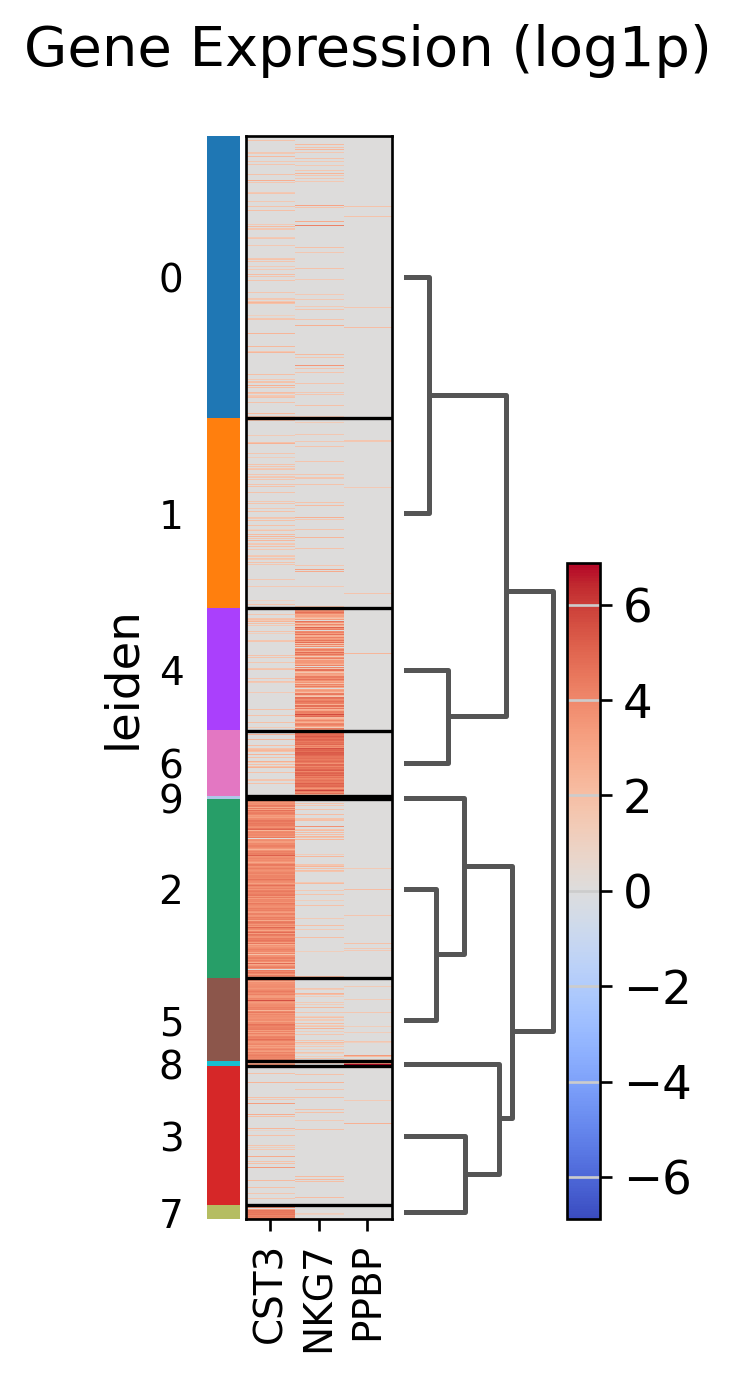

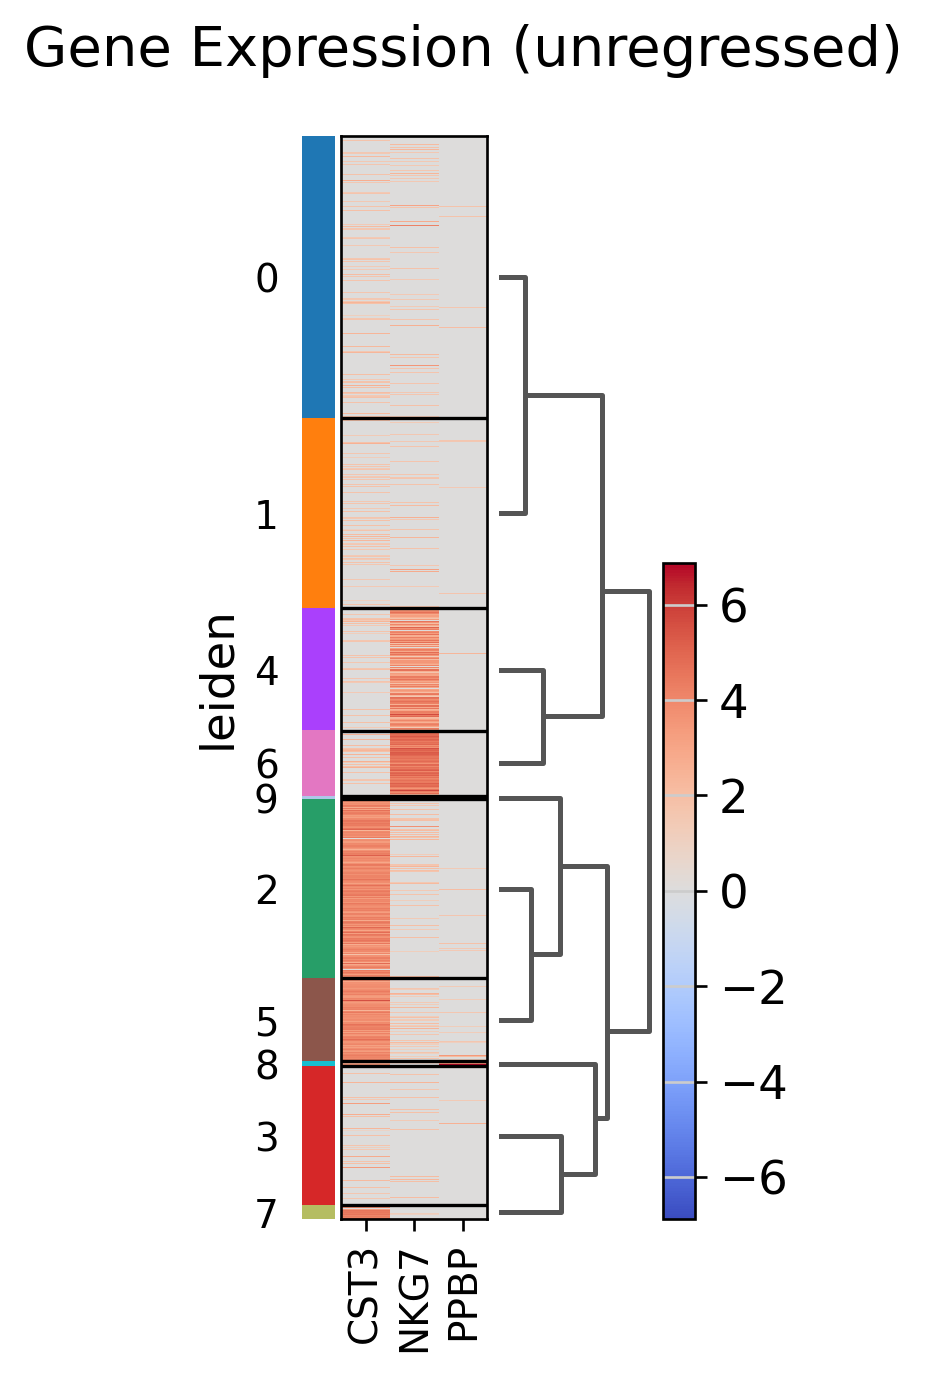

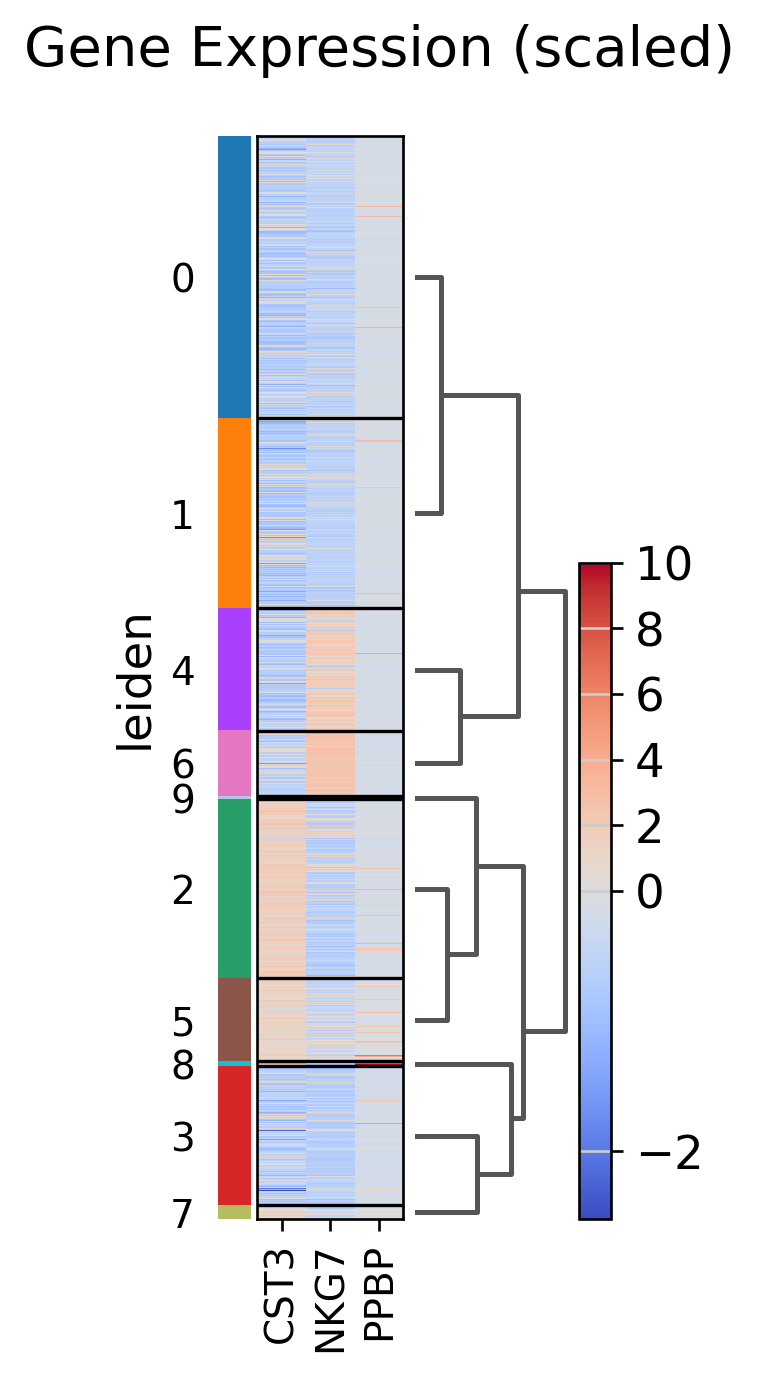

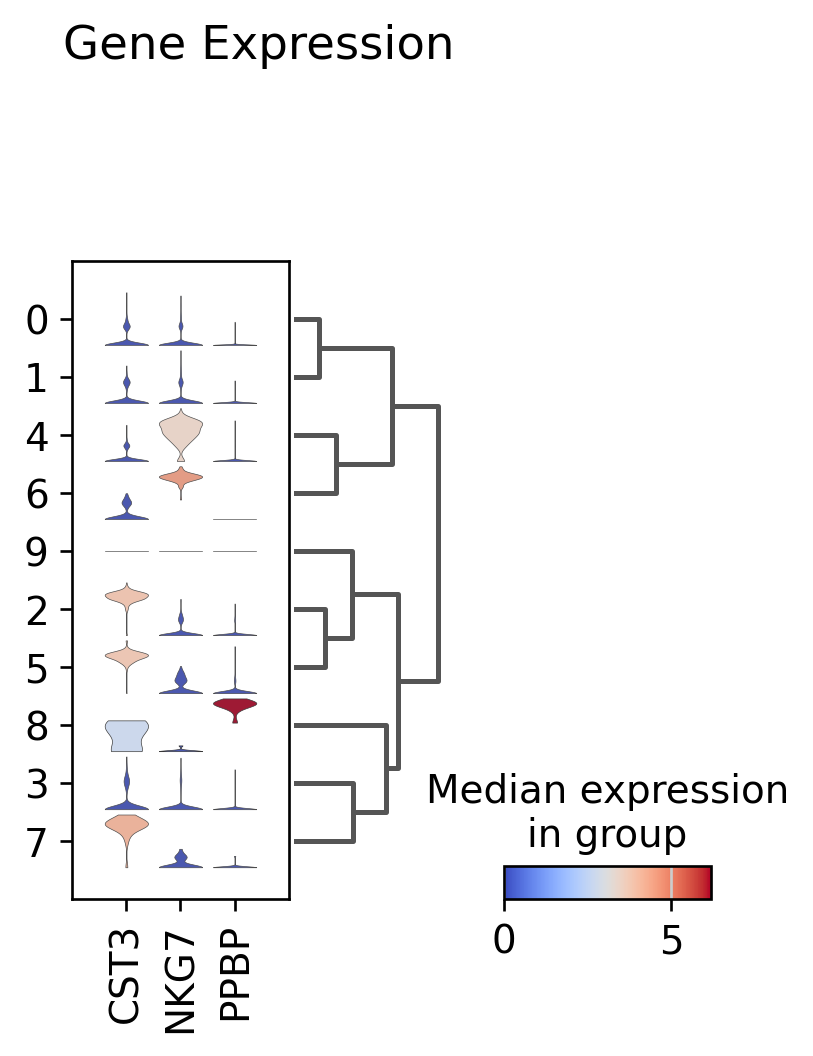

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

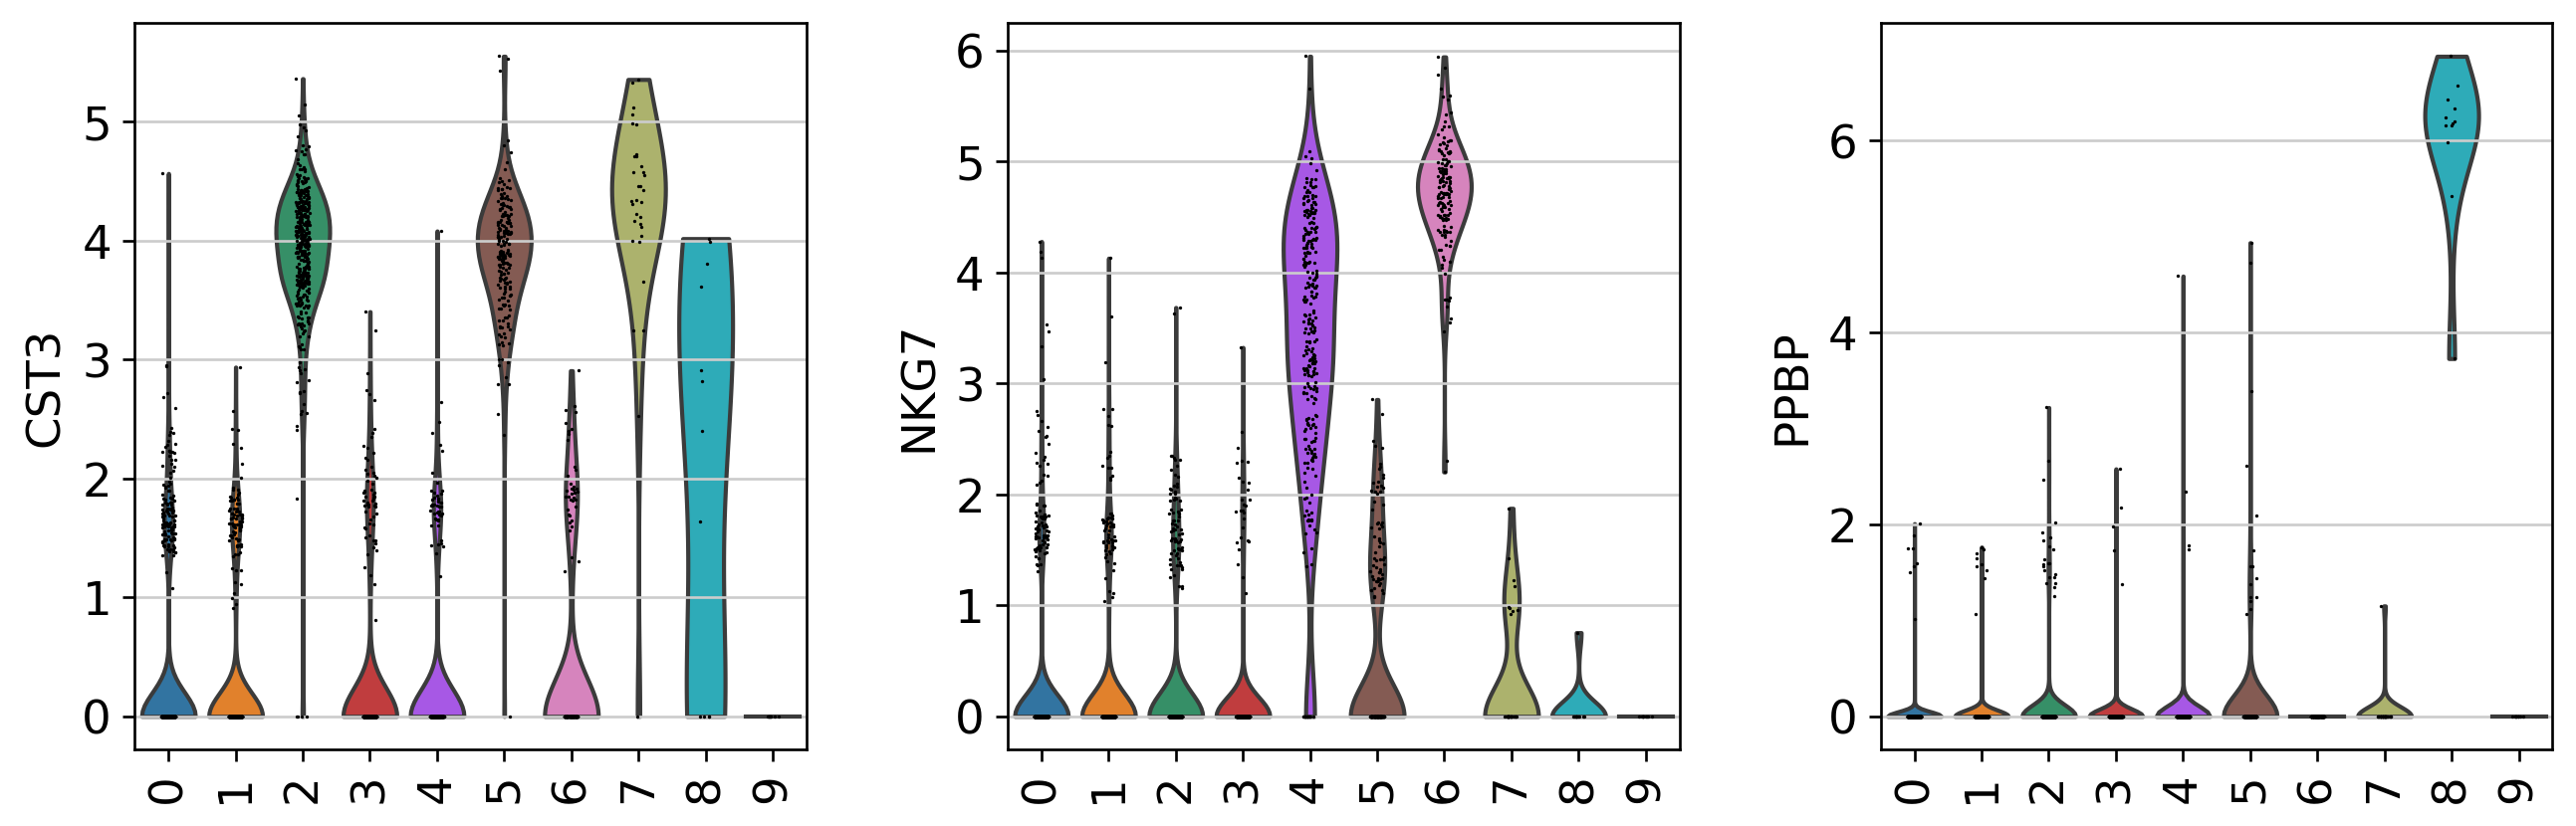

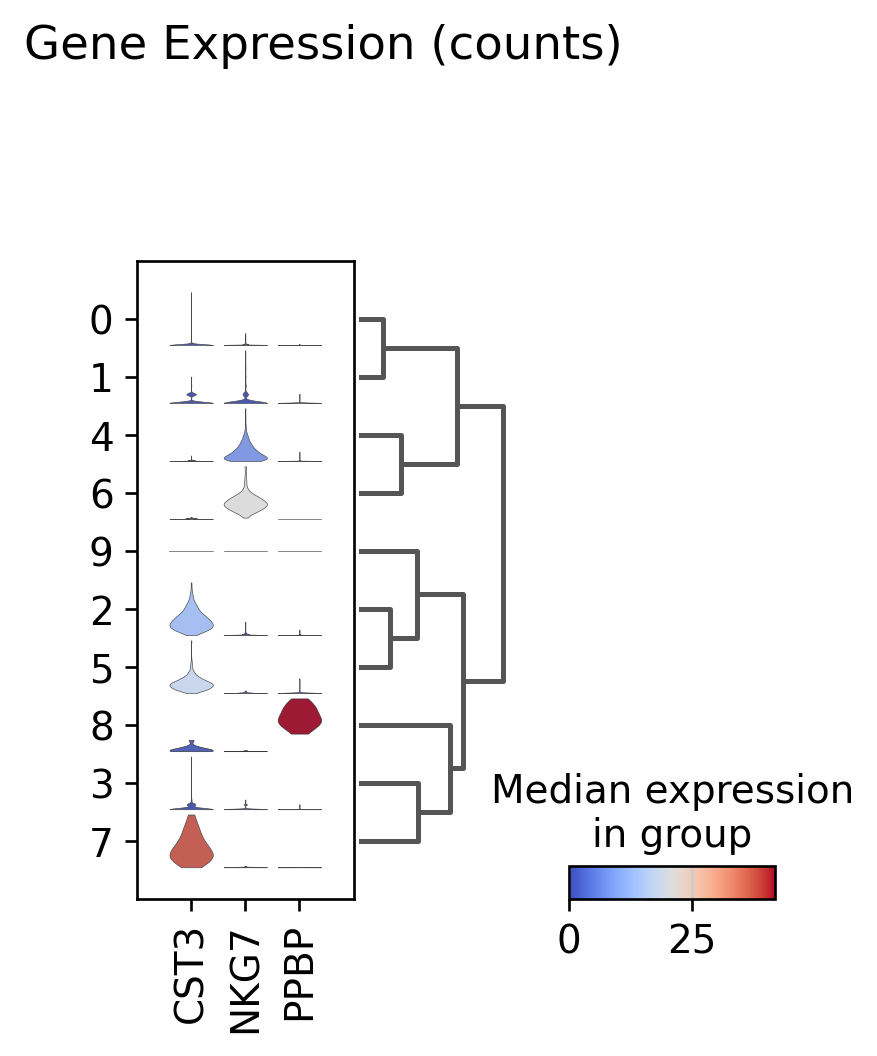

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

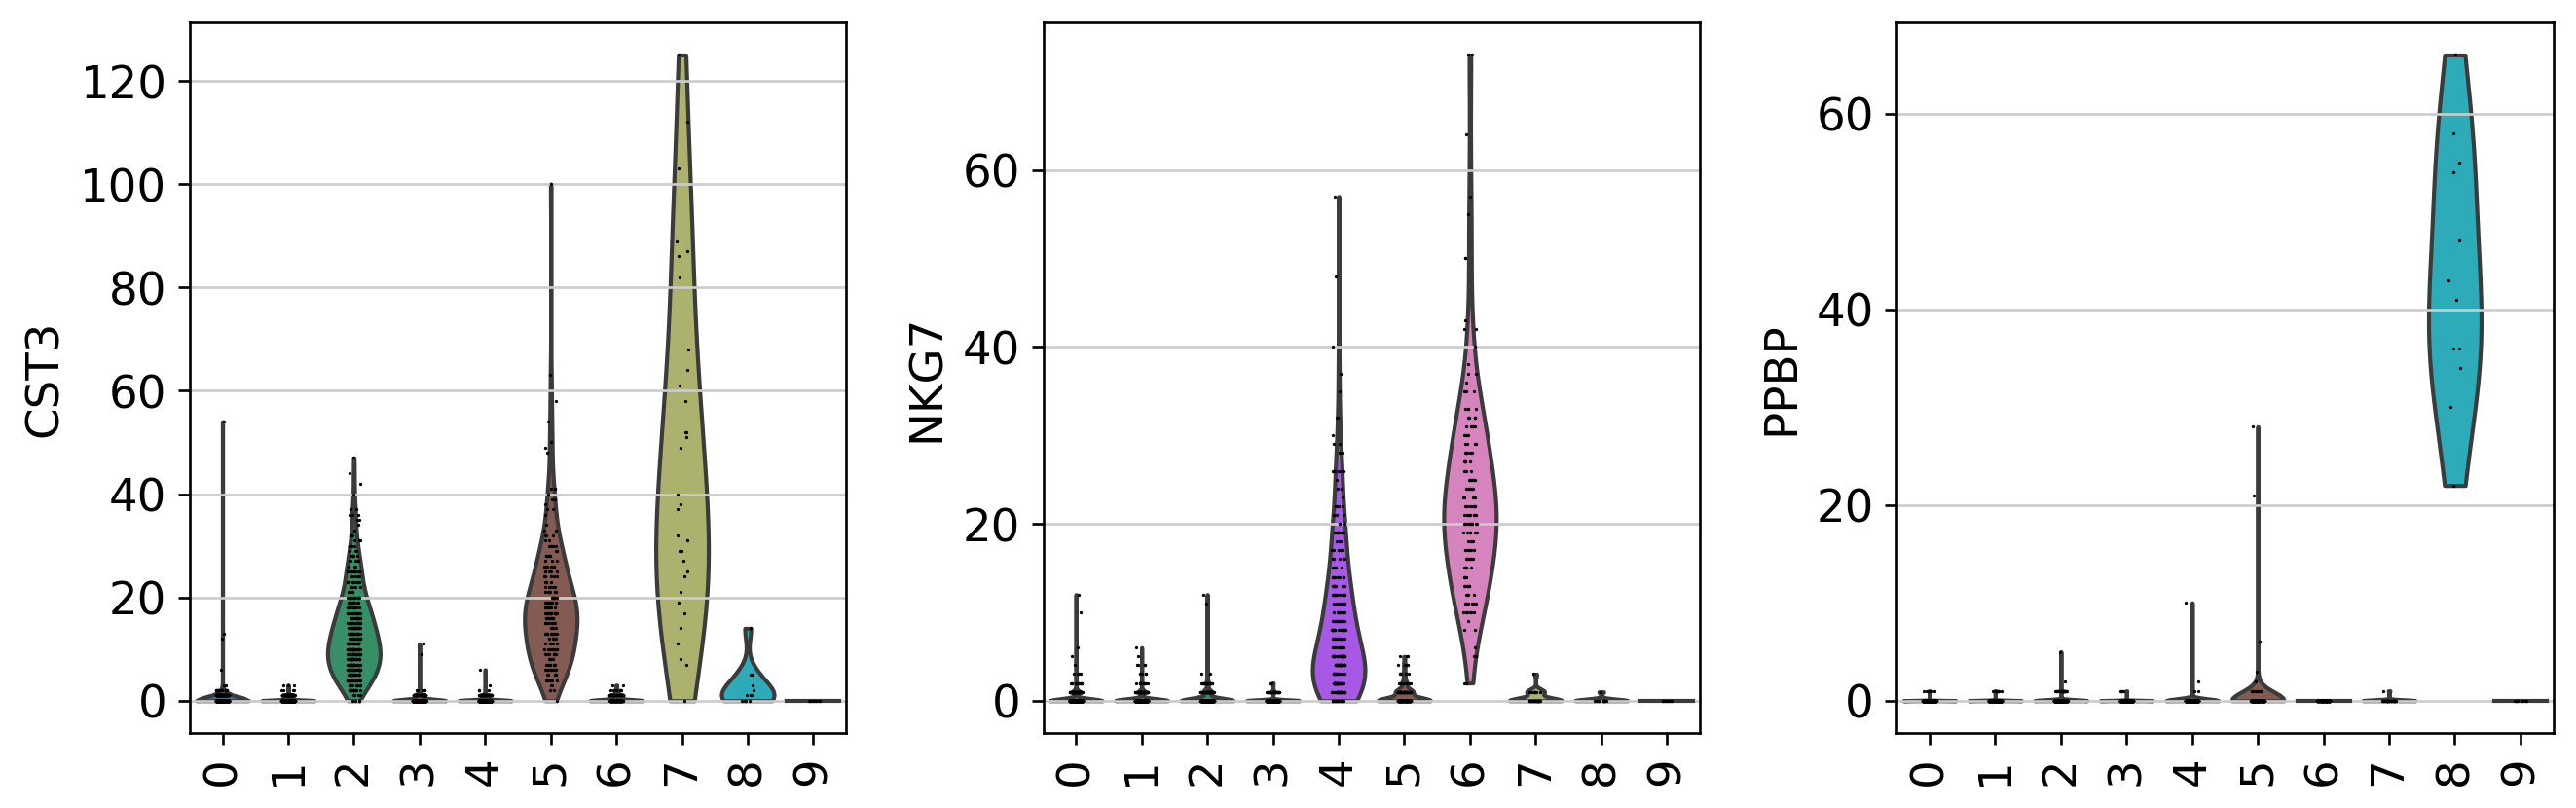

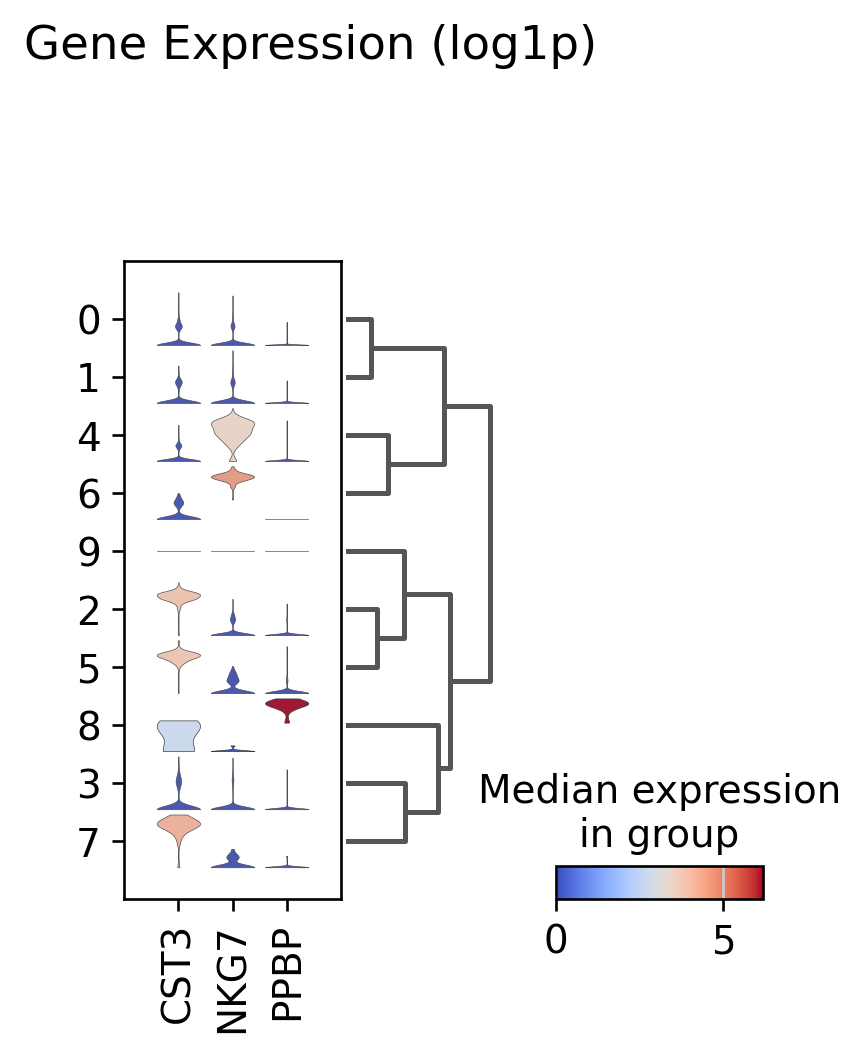

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

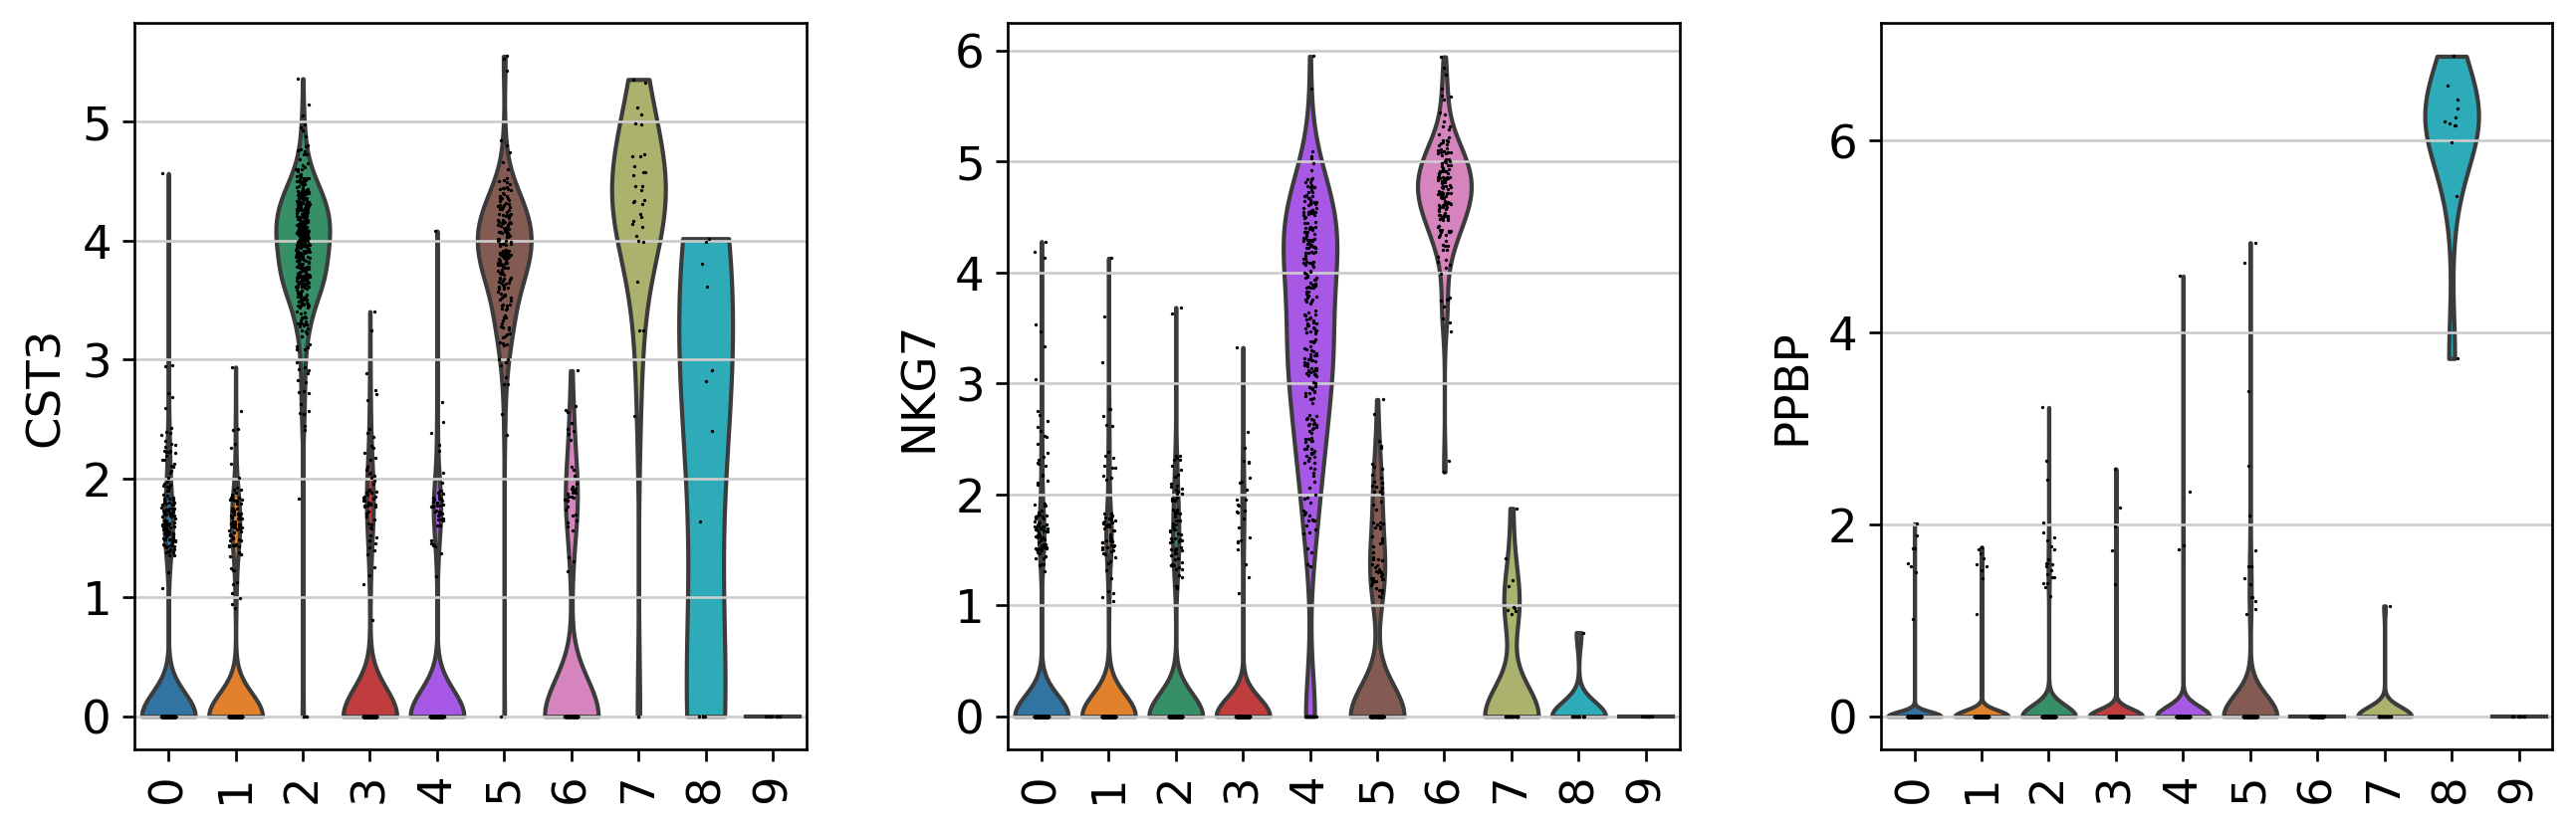

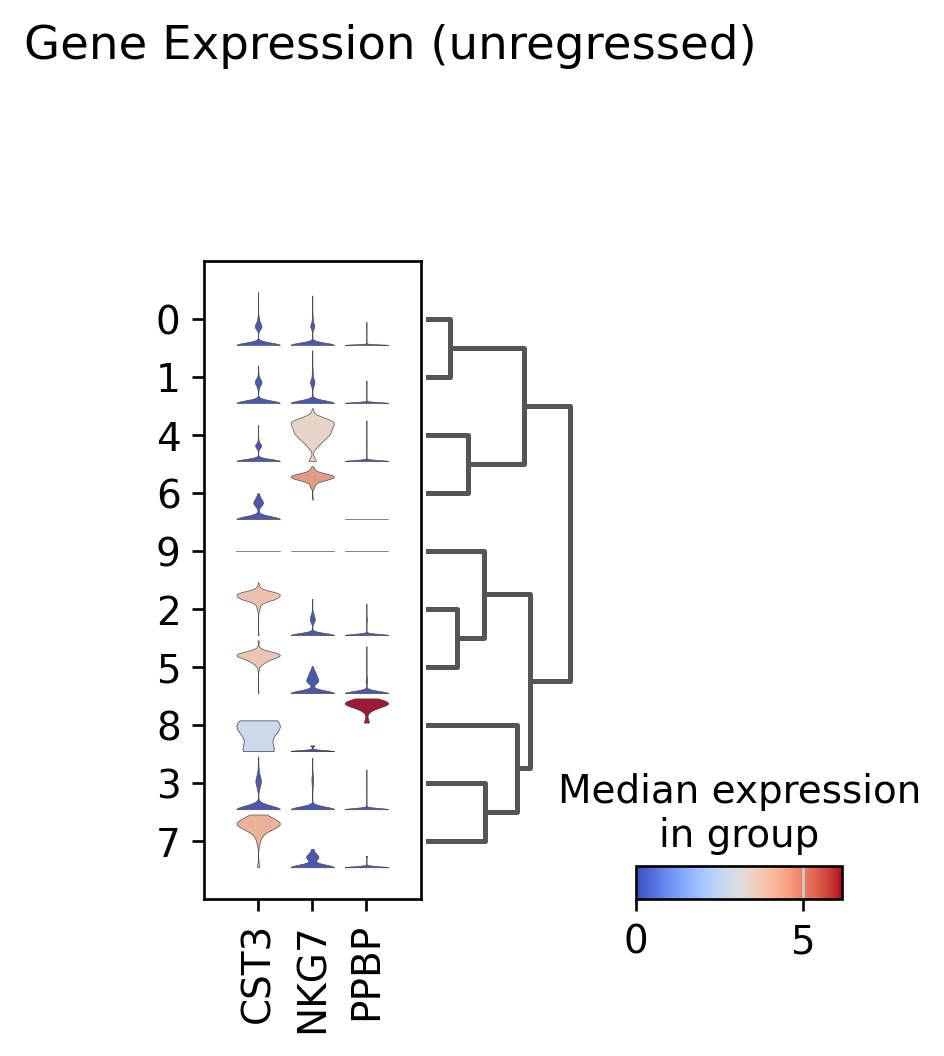

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

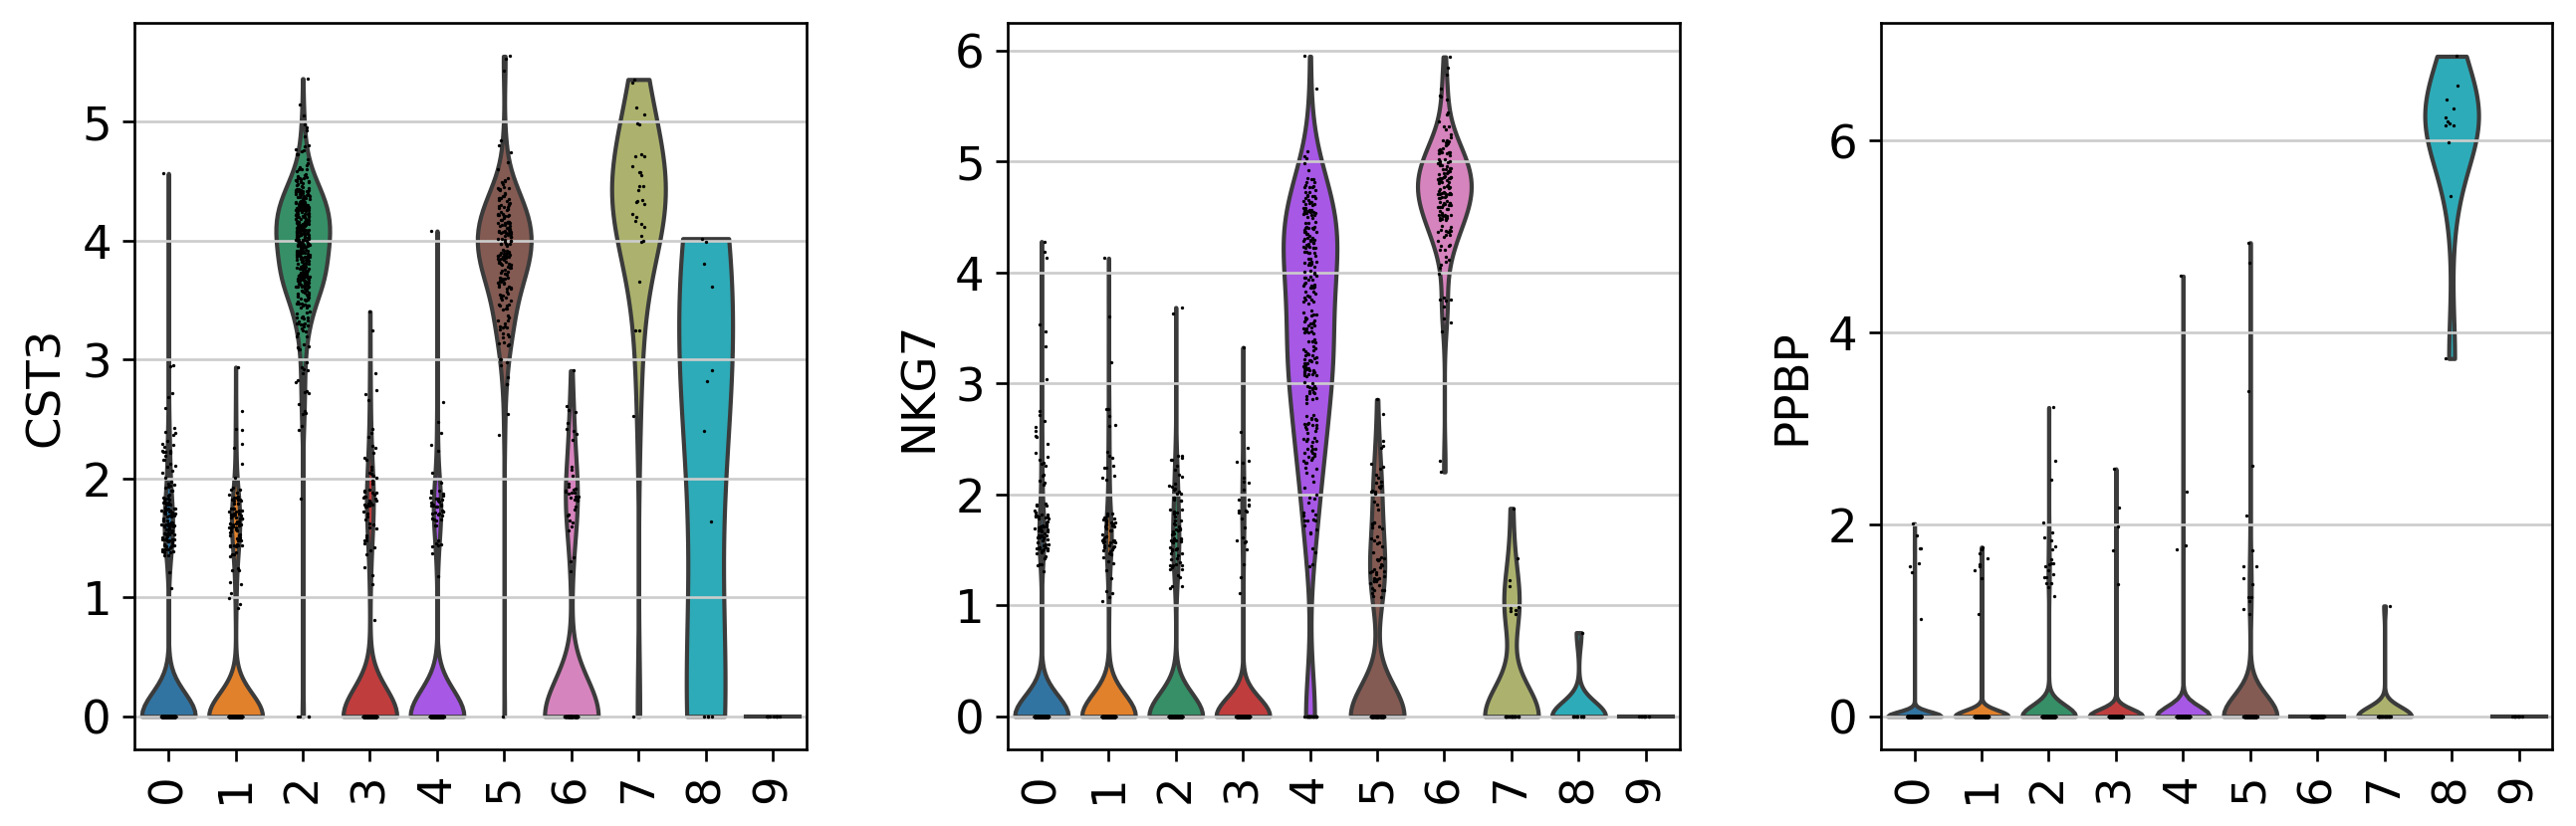

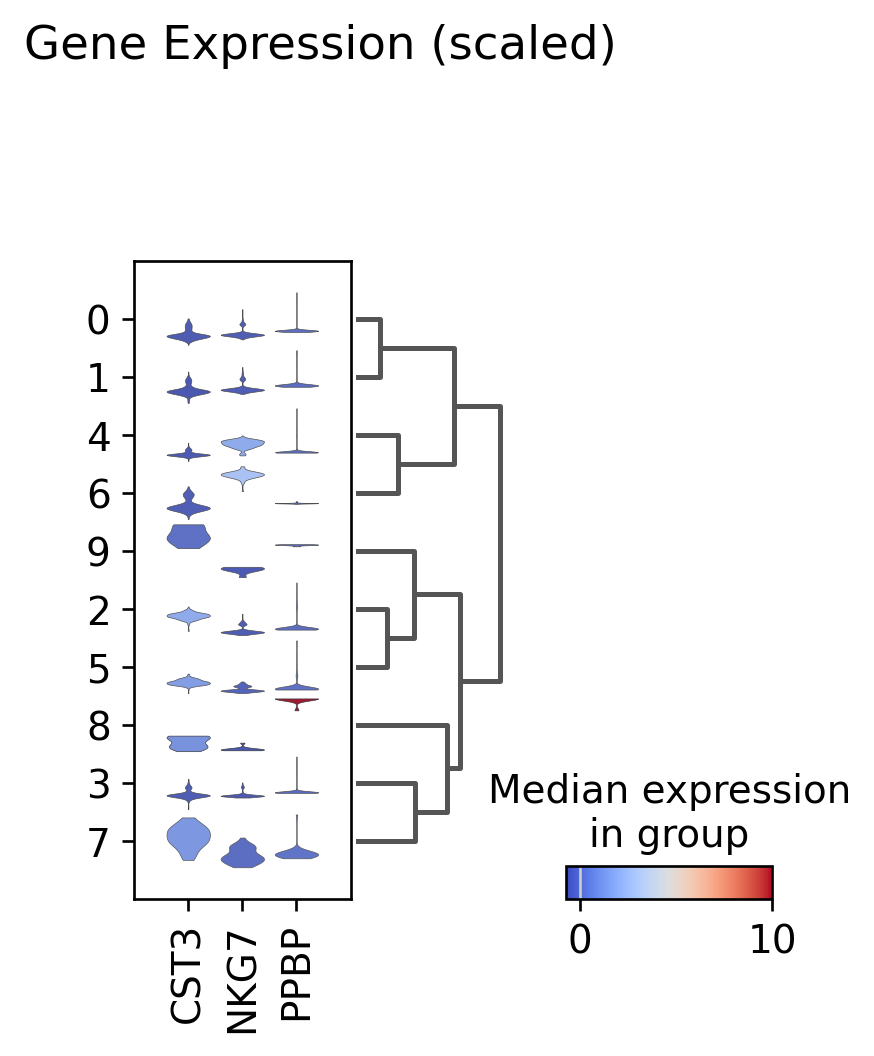

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 


<<< PLOTTING GEX (Dot) >>>


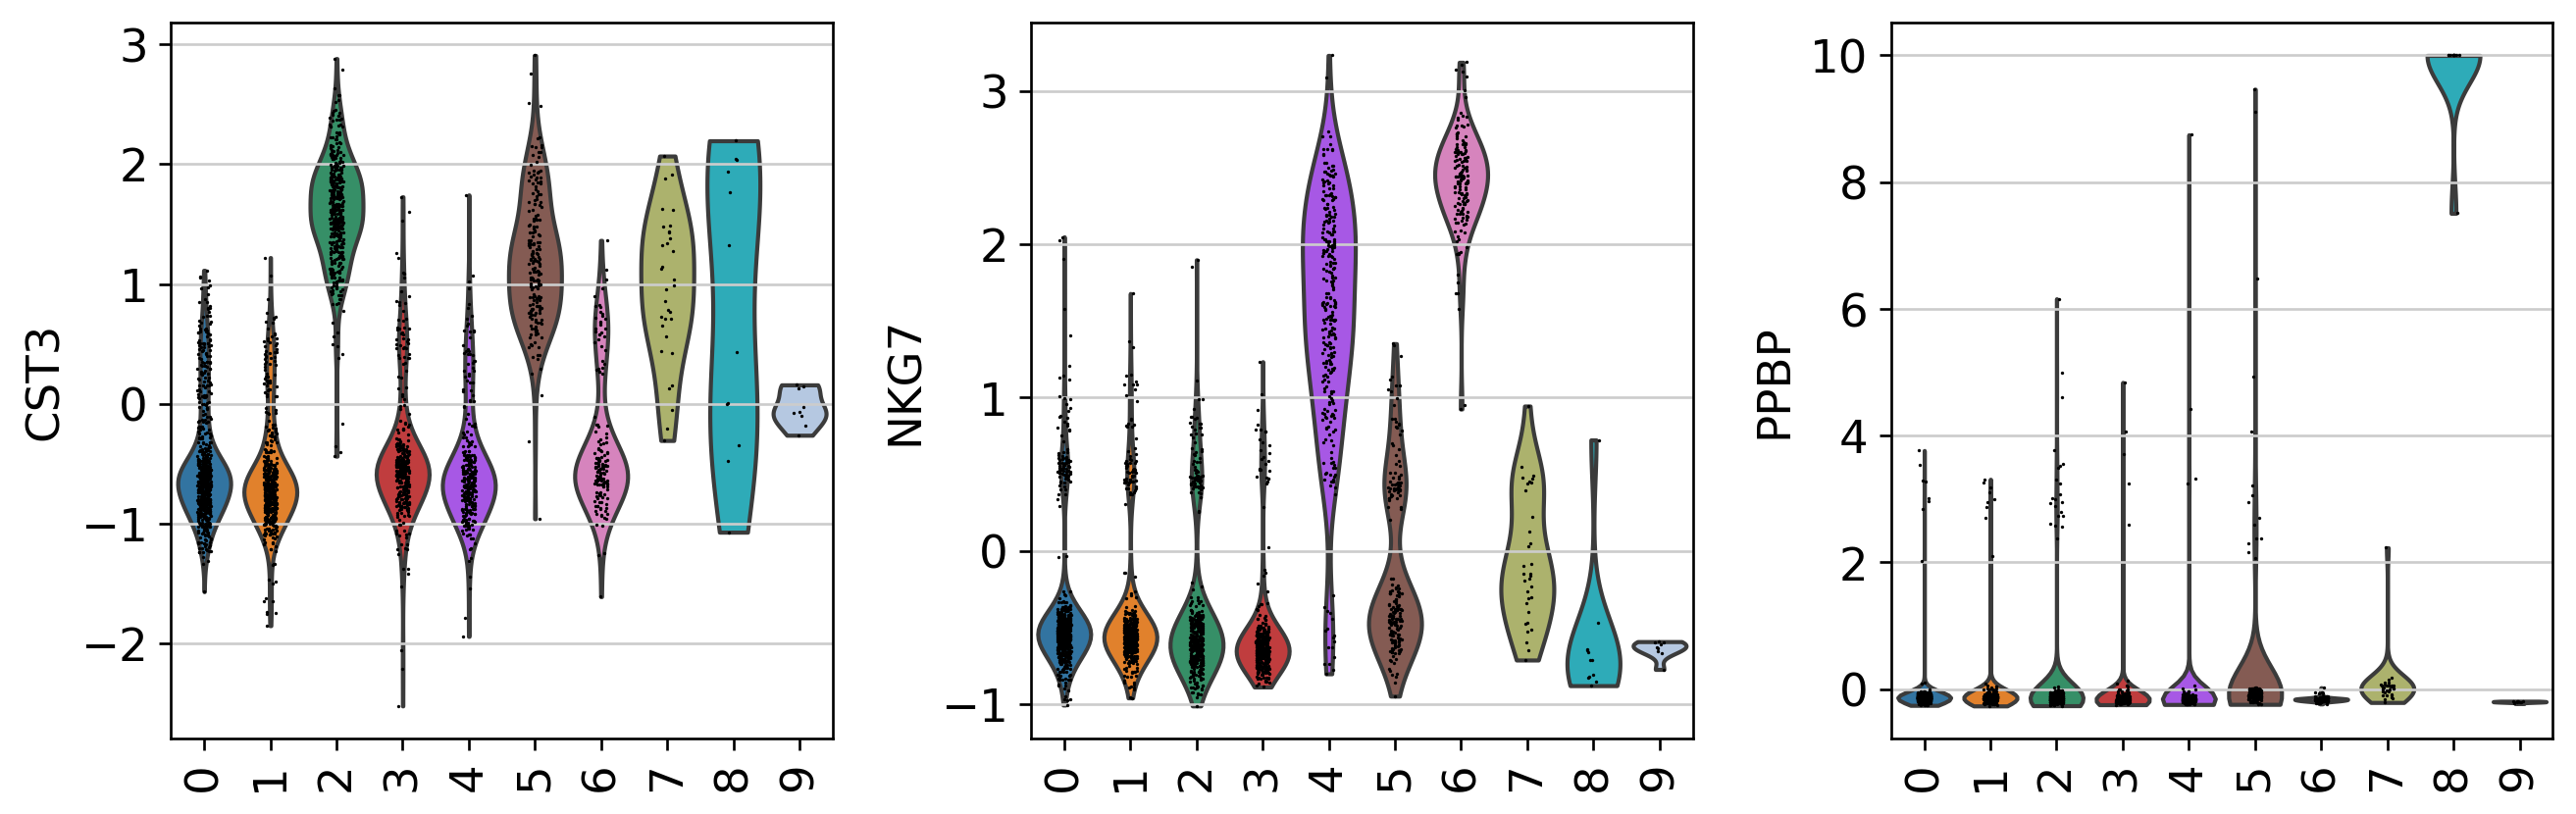

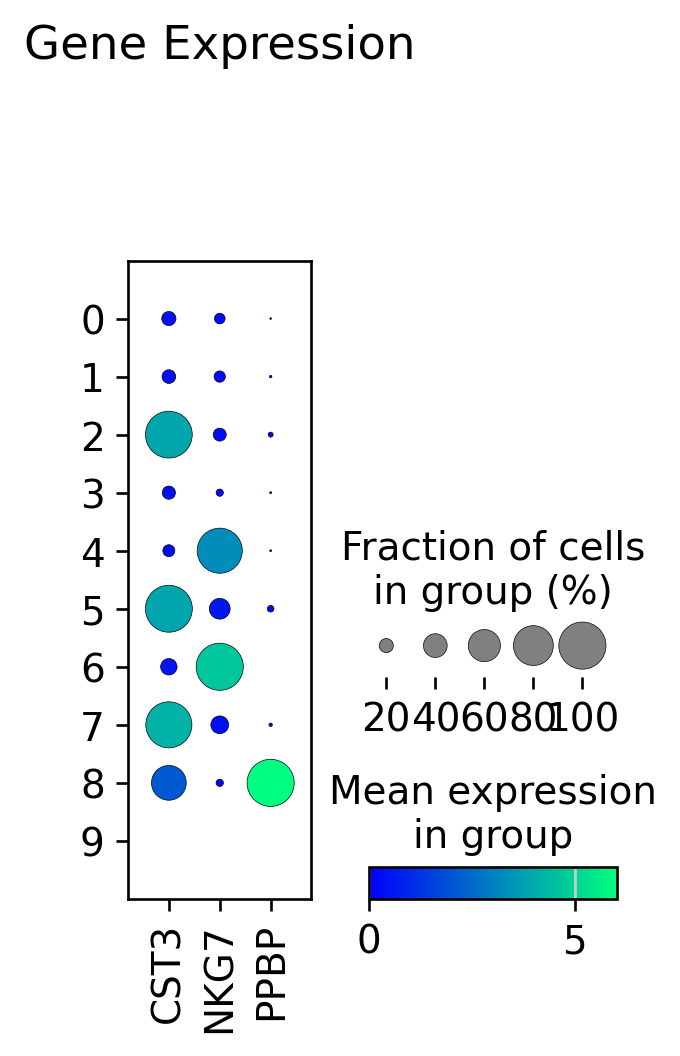


<<< PLOTTING UMAP >>>

<<< PLOTTING UMAP >>>

<<< PLOTTING GEX ON UMAP >>>


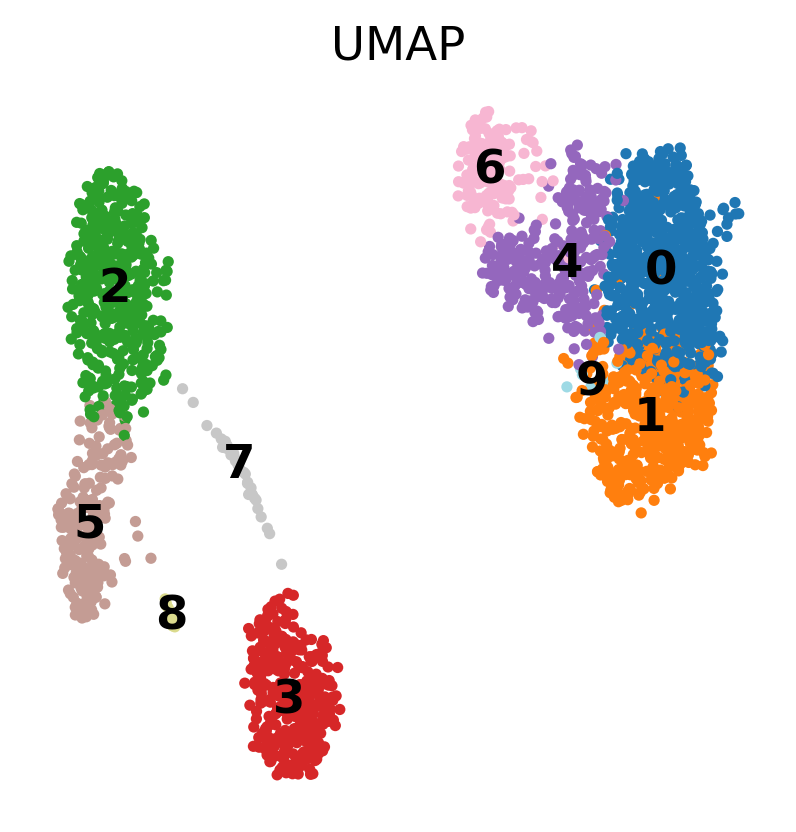

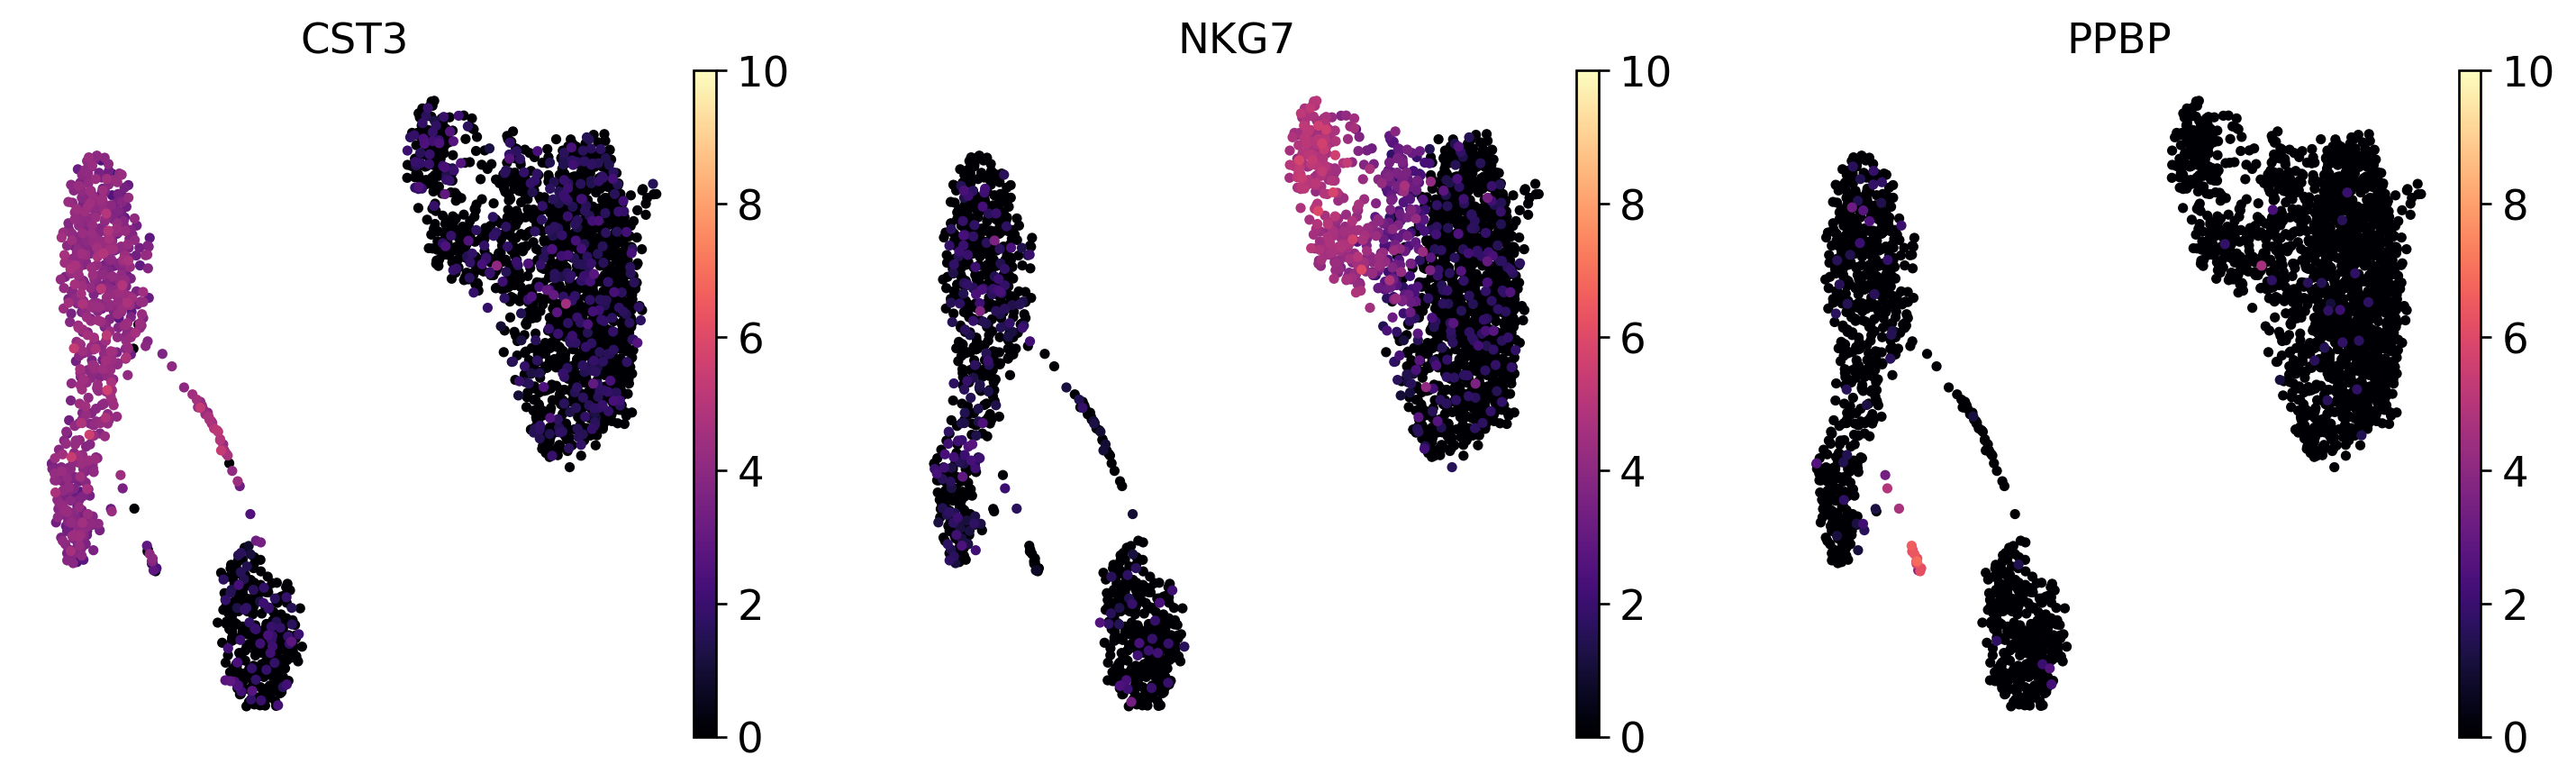

In [2]:
self = Omics(file, **kws_init)  # initialize object
_, res_pp = self.preprocess(**kws_pp, seed=0)  # preprocess; res_pp = plots
_, res_cl = self.cluster(**kws_cluster, seed=0)  # cluster; res_cl = plots
mark, fig = self.find_markers(n_genes=8)  # find cluster gene markers
_, res_ct = self.annotate_clusters(model_celltypist)  # [results, plots]
figures = self.plot(genes, kws_umap=dict(cmap="magma", vcenter=None, vmax=10),
                    kws_heat=kws_plots, kws_matrix=kws_plots)

# Compare Scanpy Tutorial Code

In [3]:
new_cluster_names = [
    "CD4 T", "CD14 Monocytes",
    "B", "CD8 T", 
    "NK", "FCGR3A Monocytes",
    "Dendritic", "Megakaryocytes"]
marker_genes = ["IL7R", "CD79A", "MS4A1", "CD8A", "CD8B", "LYZ", "CD14",
                "LGALS3", "S100A8", "GNLY", "NKG7", "KLRB1",  
                "FCGR3A", "MS4A7", "FCER1A", "CST3", "PPBP"]

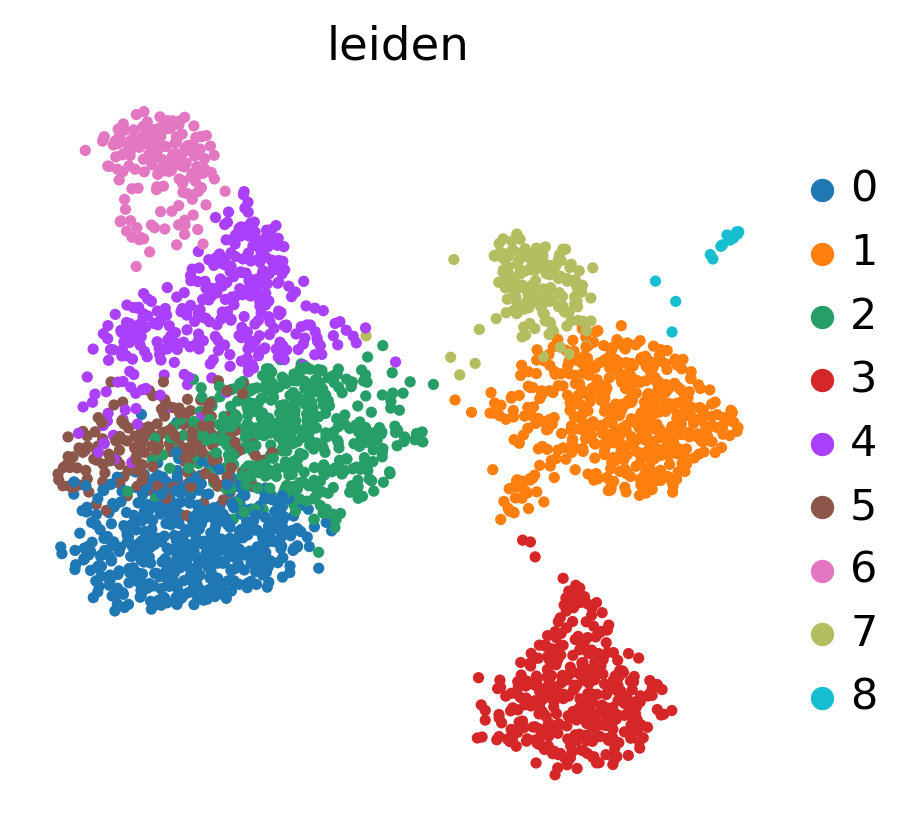

KeyError: 'rank_genes_groups'

In [4]:
adata = sc.read_10x_mtx(file, var_names="gene_symbols", cache=True)

adata.var_names_make_unique()

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, 
                           log1p=False, inplace=True)
# sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
#              jitter=0.4, multi_panel=True)

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

sc.pp.log1p(adata)

adata.raw = adata

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden"])

for x in adata.obs["leiden"].unique():
    sc.pl.rank_genes_groups_violin(adata, groups=x, n_genes=8)
sc.pl.violin(adata, genes, groupby="leiden")
sc.pl.dotplot(adata, marker_genes, groupby="leiden")
sc.pl.stacked_violin(adata, marker_genes, groupby="leiden", rotation=90)